# "Pré-processamento de Dados para Mineração: Uma Abordagem Prática com a Base de Dados: Interrupções de Energia Elétrica nas Redes de Distribuição"

**Introdução**

Na mineração de dados, o pré-processamento é o ponto de partida essencial para garantir a qualidade e a utilidade dos dados que serão analisados. É o processo de limpeza, organização e preparação dos dados brutos para análise posterior. Sem um pré-processamento adequado, os dados podem conter ruído, inconsistências e valores ausentes, o que pode levar a conclusões errôneas e modelos imprecisos. Portanto, entender a importância do pré-processamento de dados é fundamental para garantir resultados confiáveis e significativos na mineração de dados. Nesta introdução, exploraremos brevemente o papel crucial do pré-processamento na extração de informações valiosas a partir de conjuntos de dados.

**Objetivo**

O objetivo deste trabalho é aplicar técnicas de pré-processamento em uma base de dados específica, com foco na preparação dos dados para análises futuras relacionadas ao tema "Interrupções de Energia Elétrica nas Redes de Distribuição". Essas técnicas visam limpar, organizar e transformar os dados brutos em um formato mais adequado e compreensível, de modo a facilitar a extração de informações relevantes sobre interrupções de energia elétrica. Ao realizar o pré-processamento, buscamos identificar e corrigir inconsistências, preencher valores ausentes, remover outliers e transformar os dados conforme necessário para facilitar análises estatísticas, modelagem preditiva ou qualquer outra forma de análise exploratória. O objetivo final é preparar a base de dados de forma que possa fornecer insights significativos e precisos sobre os padrões, causas e impactos das interrupções de energia elétrica nas redes de distribuição, contribuindo assim para melhorias na gestão e manutenção dessas redes.

**Descrição da Base de Dados**

A base de dados escolhida é uma coleção abrangente de informações sobre todas as interrupções de energia elétrica ocorridas nas redes de distribuição de energia elétrica do Brasil. Aqui está uma descrição detalhada:

**Fonte dos Dados**: Os dados são coletados de várias redes de distribuição de energia elétrica em todo o país. No entanto, é importante notar que as interrupções ocorridas em áreas sob gestão de permissionárias de serviço público (cooperativas) regulamentados pela ANEEL não estão incluídas nesta base de dados.

**Natureza dos Dados**: Os dados são de natureza quantitativa e temporal, registrando cada interrupção de energia elétrica em termos de sua duração, localização, causa e outros detalhes relevantes. Eles são estruturados e organizados de maneira a facilitar análises e relatórios detalhados.

**Relevância dos Dados**: Esta base de dados é extremamente relevante para uma variedade de aplicações. Ela pode ser usada para analisar a confiabilidade das redes de distribuição de energia, identificar áreas problemáticas que precisam de manutenção ou atualização, e desenvolver estratégias para minimizar interrupções futuras. Além disso, os dados podem ser úteis para pesquisadores que estudam a infraestrutura de energia do país, bem como para formuladores de políticas que buscam melhorar a resiliência e eficiência do sistema de energia. 

Em resumo, esta base de dados oferece uma visão valiosa sobre o desempenho das redes de distribuição de energia elétrica do Brasil, contribuindo para esforços contínuos de melhoria e inovação no setor de energia.

**Trabalhos Relacionados**

Existem trabalhos na literatura que utilizaram a base de dados de interrupções de energia elétrica. Aqui estão alguns exemplos:

**Análise das Principais Causas de Descontinuidade no Fornecimento de Energia Elétrica e de seus Impactos nos Indicadores de Qualidade**: Este trabalho utilizou a base de dados para analisar as principais causas de interrupções no fornecimento de energia elétrica e seus impactos nos indicadores de qualidade. O pré-processamento dos dados envolveu a categorização das interrupções por tipo de rede (aérea ou subterrânea) e a análise foi realizada com base nos indicadores de duração (DEC) e frequência (FEC) das interrupções.

Link: <http://www.repositorio.poli.ufrj.br/monografias/monopoli10032029.pdf>

**Interrupções de energia elétrica registram queda no Brasil em 2020, diz ANEEL**: Este artigo de notícias utilizou a base de dados para relatar uma queda nas interrupções de energia elétrica no Brasil em 2020. Os dados foram analisados com base nos indicadores de duração (DEC) e frequência (FEC) das interrupções.

Link: <https://www.correiobraziliense.com.br/economia/2021/03/4912026-interrupcoes-de-energia-eletrica-registram-queda-no-brasil-em-2020-diz-aneel.html>


**Metodologia**

A base de dados “Interrupções de Energia Elétrica nas Redes de Distribuição” é uma escolha pelas razões:

**Relevância**: Esta base de dados é extremamente relevante para entender a performance e confiabilidade das redes de distribuição de energia elétrica do Brasil. Ela pode ajudar a identificar áreas problemáticas e desenvolver estratégias para minimizar interrupções futuras.

**Compreensividade**: A base de dados oferece uma visão abrangente das interrupções de energia, incluindo detalhes como duração, localização e causa. Isso permite uma análise detalhada e aprofundada.

**Aplicabilidade**: Os dados podem ser usados em uma variedade de aplicações, desde a melhoria da infraestrutura de energia até a formulação de políticas públicas. Além disso, eles são úteis para pesquisadores que estudam a infraestrutura de energia do país.

**Atualidade**: Como os dados são coletados continuamente, eles fornecem uma visão atual e em tempo real das interrupções de energia, o que é crucial para responder a problemas emergentes e melhorar a resiliência do sistema de energia.


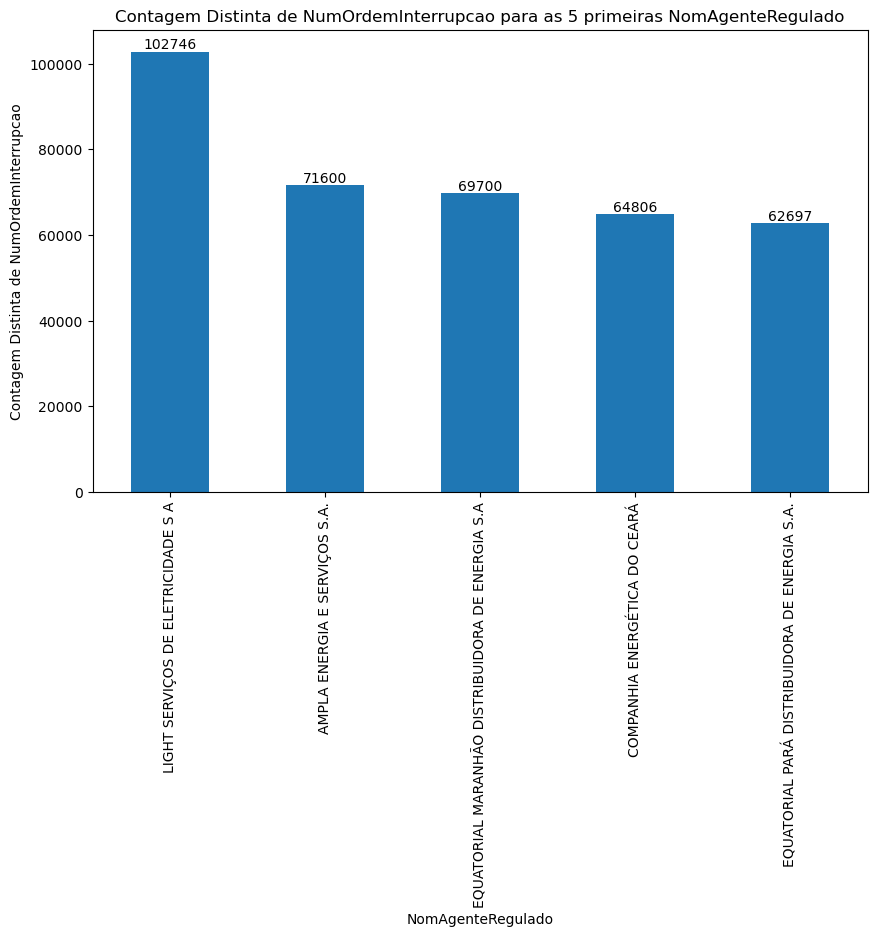

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/u11886/Desktop/MINERAÇÃO DE DADOS P1/interrupcoes-energia-eletrica-2024.csv'

# Ler o arquivo CSV
df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', dtype={3: str, 5: str}, low_memory=False)

# Agrupar os dados pela coluna 'NomAgenteRegulado' e contar os valores distintos na coluna 'NumOrdemInterrupcao'
grouped = df.groupby('NomAgenteRegulado')['NumOrdemInterrupcao'].nunique()

# Ordenar o DataFrame agrupado em ordem decrescente
grouped_sorted = grouped.sort_values(ascending=False)

# Pegar as 5 primeiras 'NomAgenteRegulado'
top_5 = grouped_sorted.head(5)

# Criar o gráfico
plt.figure(figsize=(10,6))
bars = top_5.plot(kind='bar')

plt.title('Contagem Distinta de NumOrdemInterrupcao para as 5 primeiras NomAgenteRegulado')
plt.xlabel('NomAgenteRegulado')
plt.ylabel('Contagem Distinta de NumOrdemInterrupcao')

# Adicionar rótulos de dados
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()


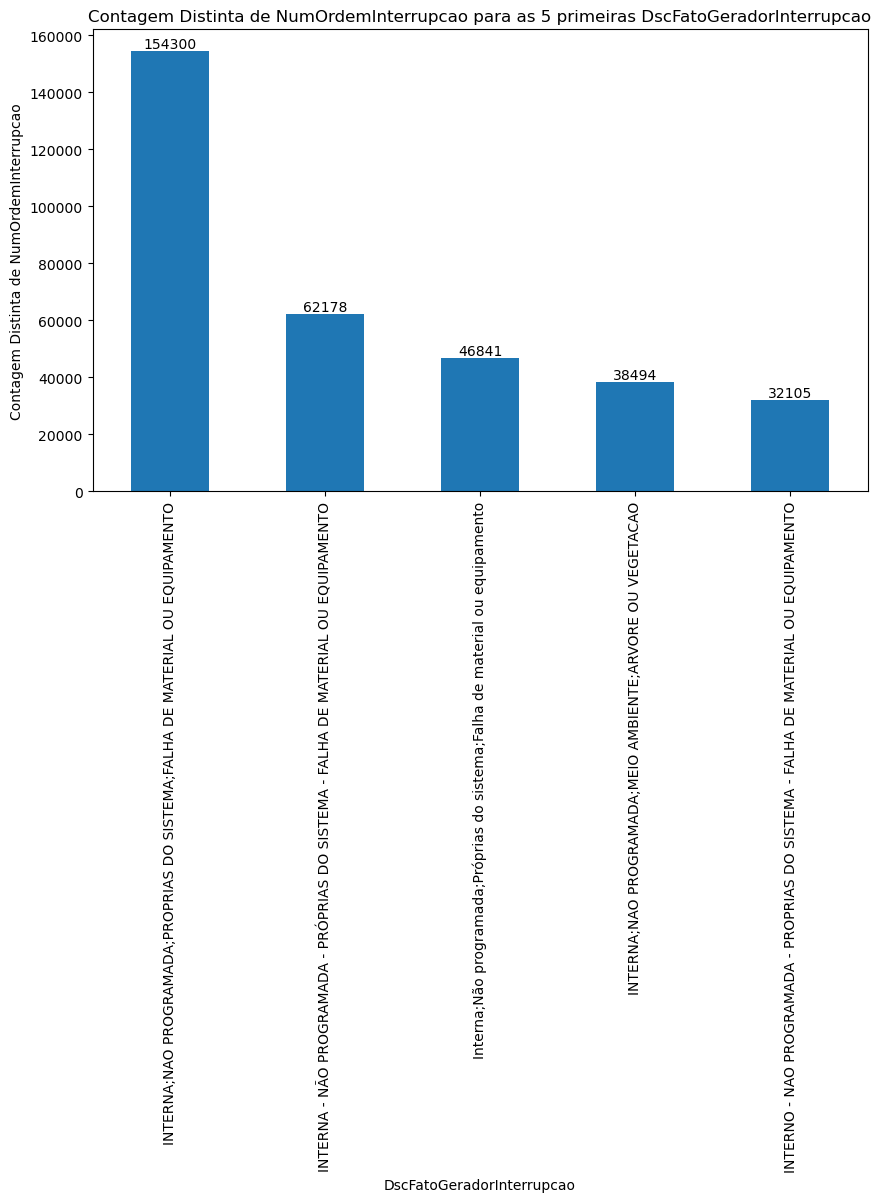

In [2]:
# Agrupar os dados pela coluna 'NomAgenteRegulado' e contar os valores distintos na coluna 'NumOrdemInterrupcao'
grouped = df.groupby('DscFatoGeradorInterrupcao')['NumOrdemInterrupcao'].nunique()

# Ordenar o DataFrame agrupado em ordem decrescente
grouped_sorted = grouped.sort_values(ascending=False)

# Pegar as 5 primeiras 'NomAgenteRegulado'
top_5 = grouped_sorted.head(5)

# Criar o gráfico
plt.figure(figsize=(10,6))
bars = top_5.plot(kind='bar')

plt.title('Contagem Distinta de NumOrdemInterrupcao para as 5 primeiras DscFatoGeradorInterrupcao')
plt.xlabel('DscFatoGeradorInterrupcao')
plt.ylabel('Contagem Distinta de NumOrdemInterrupcao')

# Adicionar rótulos de dados
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

NumOrdemInterrupcao
05-20232677683368/1-19-05-20232677683368/1-21     3.966667
05-20232678924673/1-29-05-20232678924673/1-31     5.916667
05-20232678929389/1-10-05-20232678929389/1-12     4.766667
05-20232678932535/1-7-05-20232678932535/1-9       3.566667
05-20232678944852/1-22-05-20232678944852/1-24     3.450000
                                                   ...    
DT35122663                                        5.066667
DT35122799                                        0.983333
DT35122893                                        6.666667
DT35122931                                        0.183333
DT35123019                                       29.283333
Name: DiferencaTempo, Length: 951973, dtype: float64


<IPython.core.display.Javascript object>


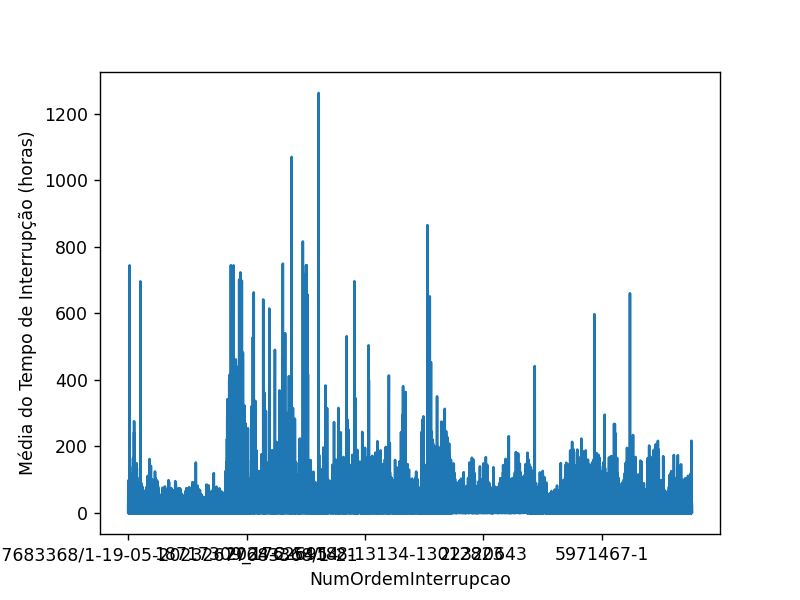

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

df['DatFimInterrupcao'] = pd.to_datetime(df['DatFimInterrupcao'], format="%d/%m/%Y %H:%M")
df['DatInicioInterrupcao'] = pd.to_datetime(df['DatInicioInterrupcao'], format="%d/%m/%Y %H:%M")

# Calcula a diferença de tempo
df['DiferencaTempo'] = df['DatFimInterrupcao'] - df['DatInicioInterrupcao']

# Converte a diferença de tempo para horas
df['DiferencaTempo'] = df['DiferencaTempo'].dt.total_seconds()/3600

# Calcula o tempo médio para cada 'NumOrdemInterrupcao'
media_tempo = df.groupby('NumOrdemInterrupcao')['DiferencaTempo'].mean()

print(media_tempo)

# Cria uma figura e um eixo
fig, ax = plt.subplots()

# Plota os dados
media_tempo.plot(kind='line', ax=ax)

# Define os rótulos dos eixos
ax.set_xlabel('NumOrdemInterrupcao')
ax.set_ylabel('Média do Tempo de Interrupção (horas)')

# Mostra o gráfico
plt.show()

<IPython.core.display.Javascript object>


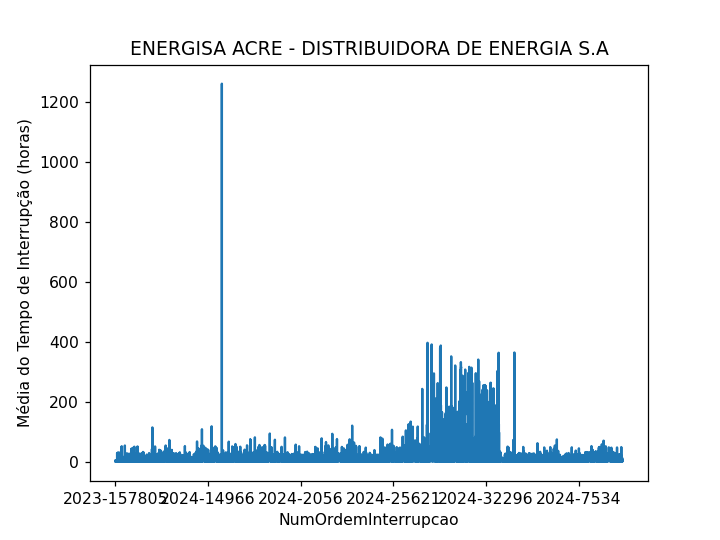

<IPython.core.display.Javascript object>


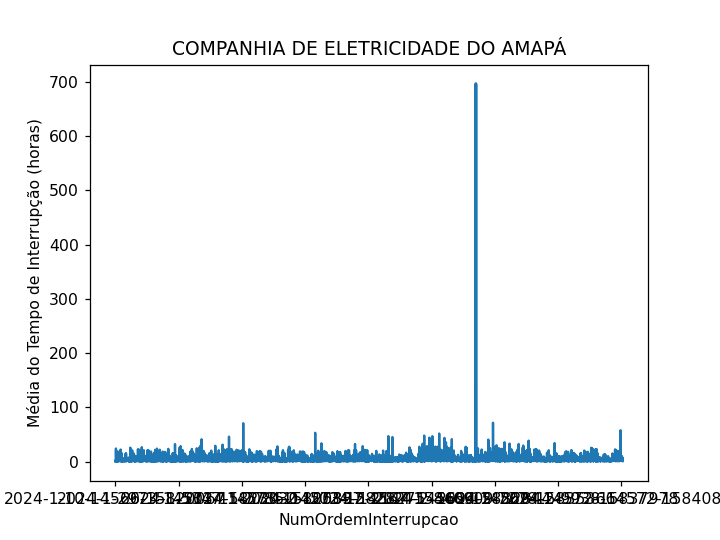

<IPython.core.display.Javascript object>


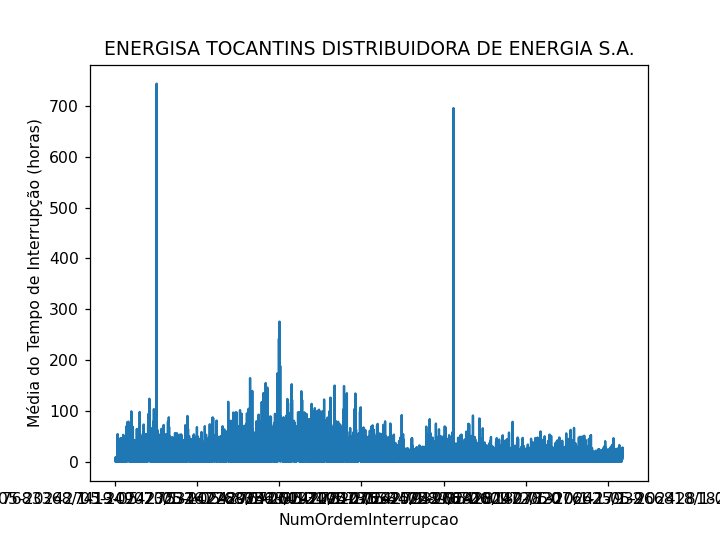

<IPython.core.display.Javascript object>


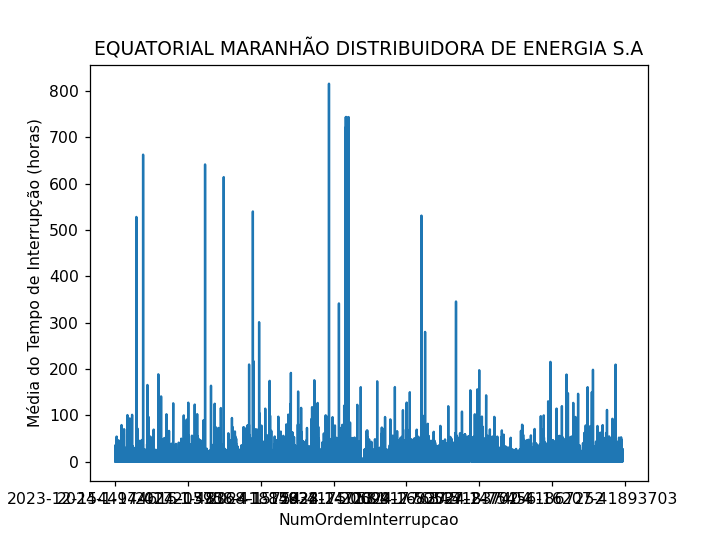

<IPython.core.display.Javascript object>


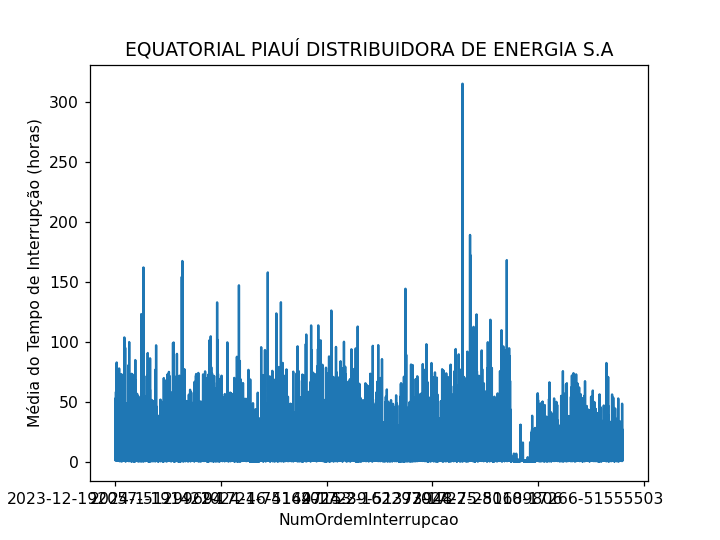

<IPython.core.display.Javascript object>


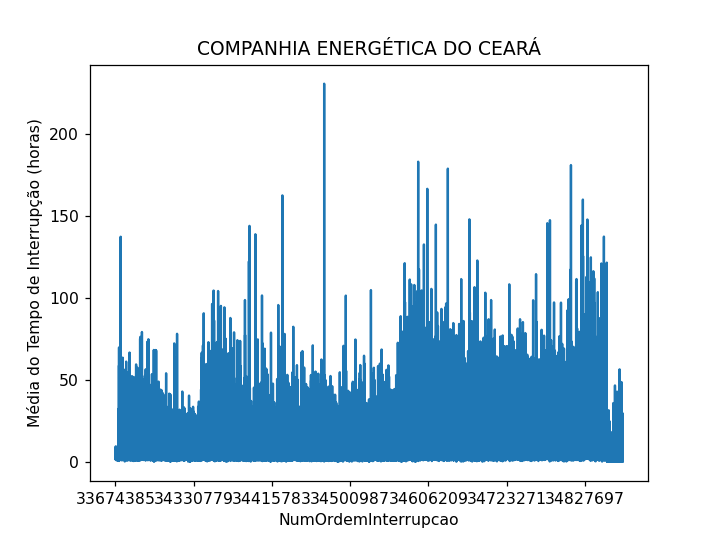

<IPython.core.display.Javascript object>


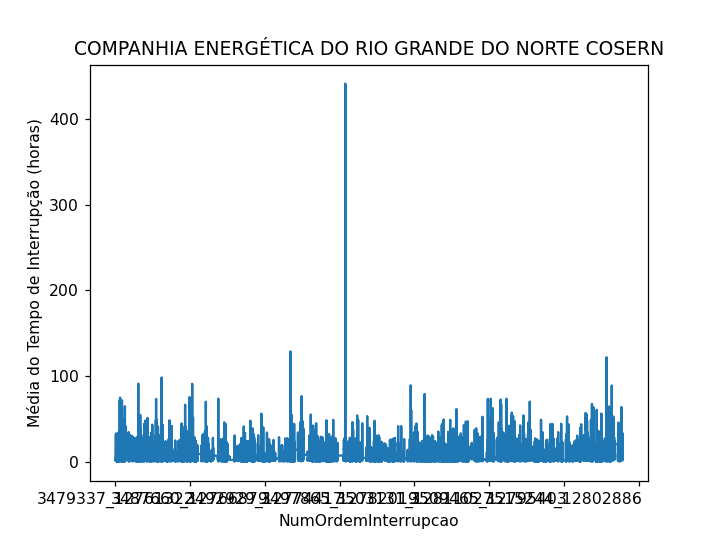

<IPython.core.display.Javascript object>


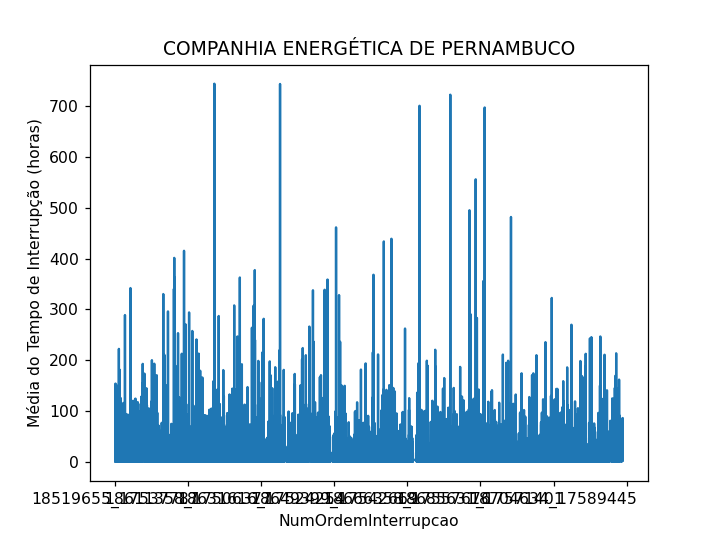

<IPython.core.display.Javascript object>


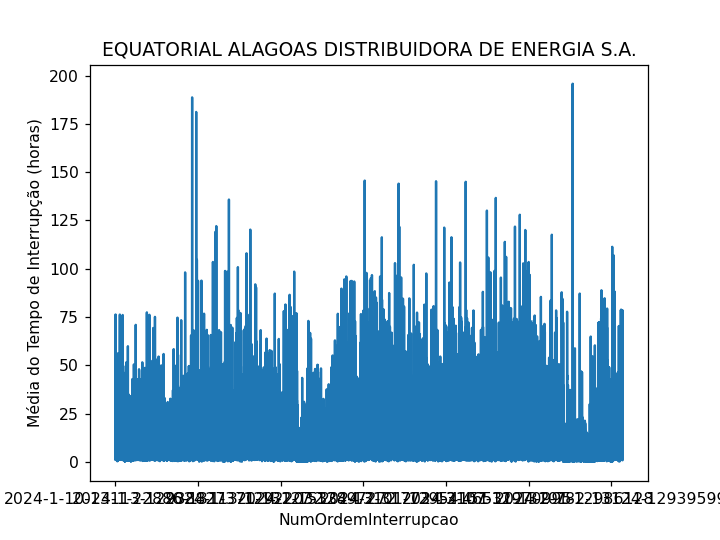

<IPython.core.display.Javascript object>


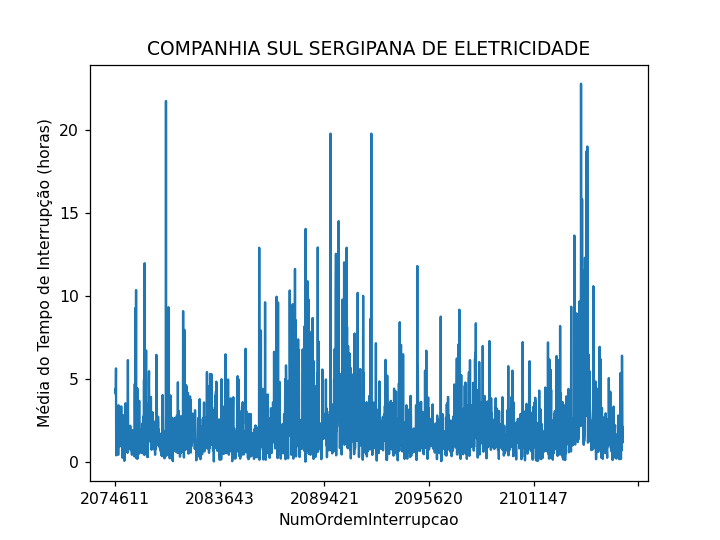

<IPython.core.display.Javascript object>


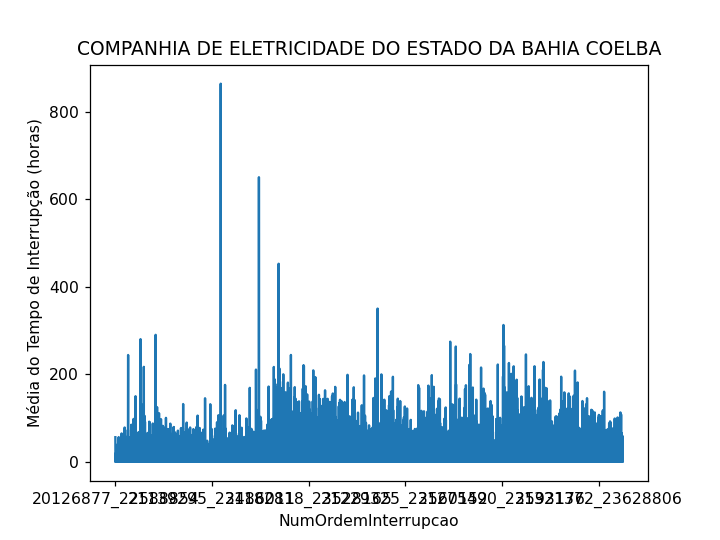

<IPython.core.display.Javascript object>


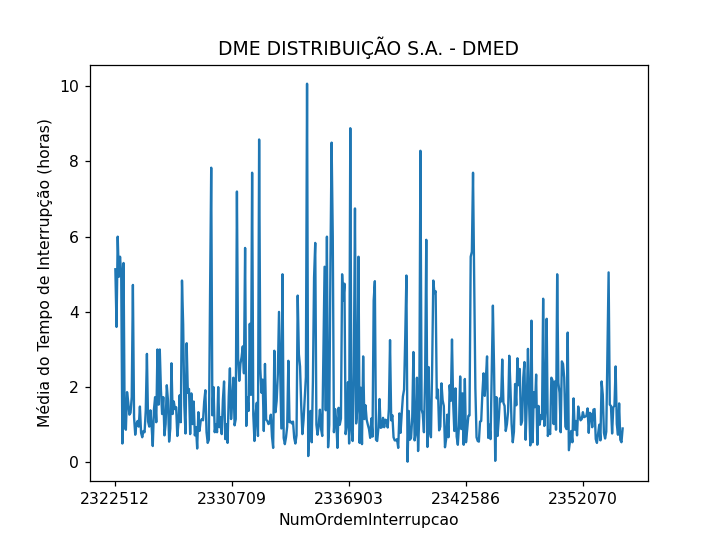

<IPython.core.display.Javascript object>


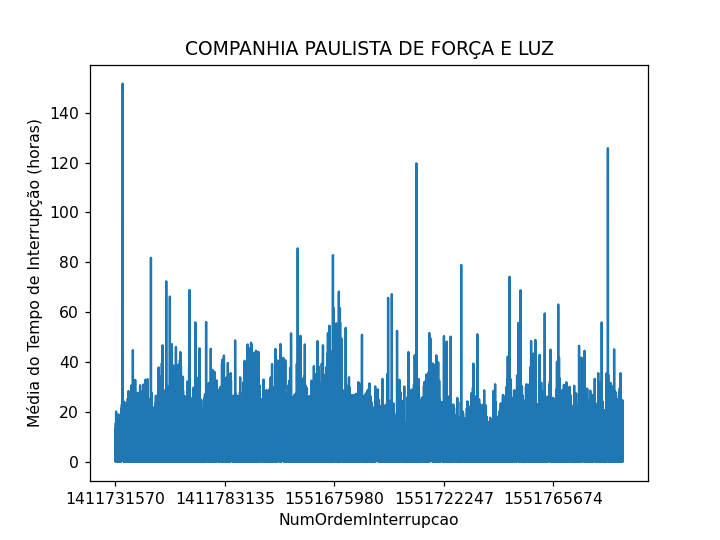

<IPython.core.display.Javascript object>


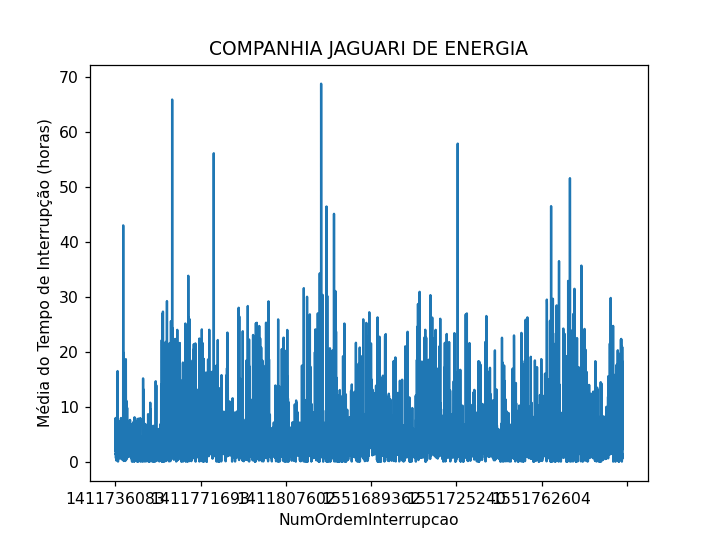

<IPython.core.display.Javascript object>


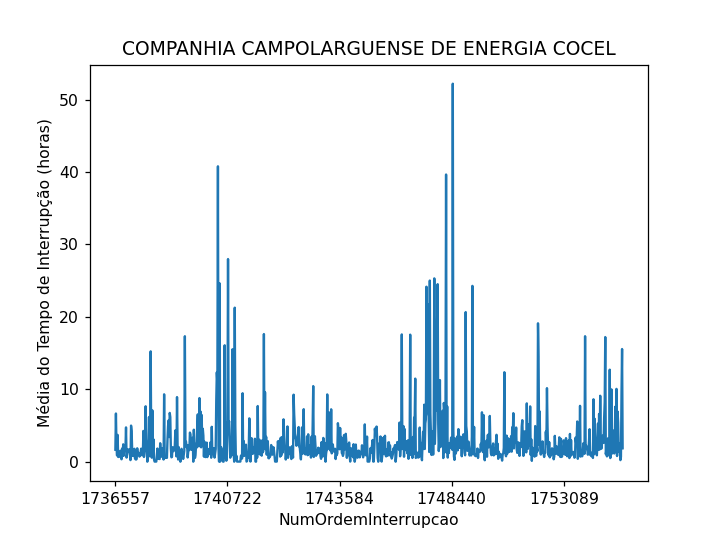

<IPython.core.display.Javascript object>


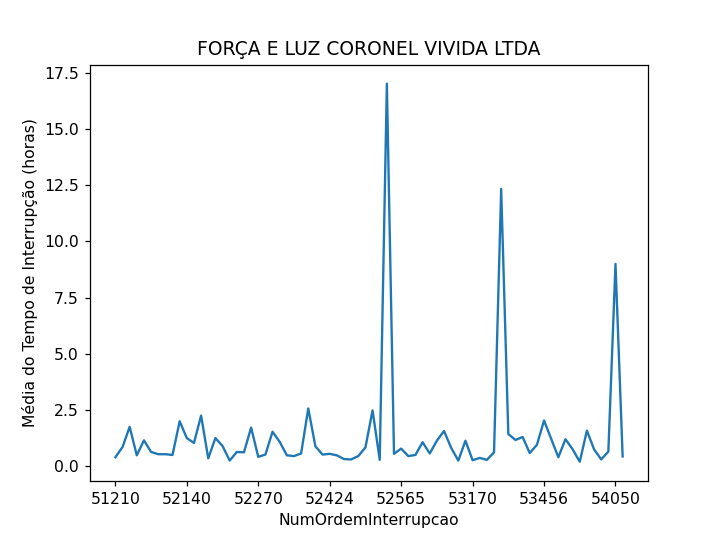

<IPython.core.display.Javascript object>


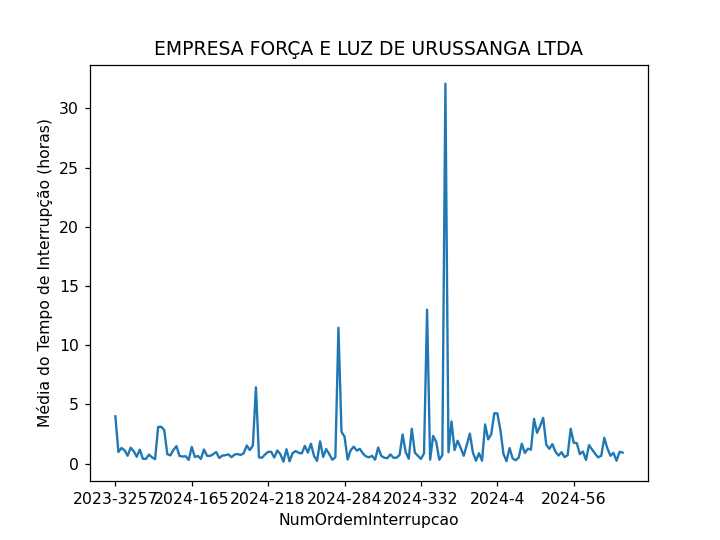

<IPython.core.display.Javascript object>


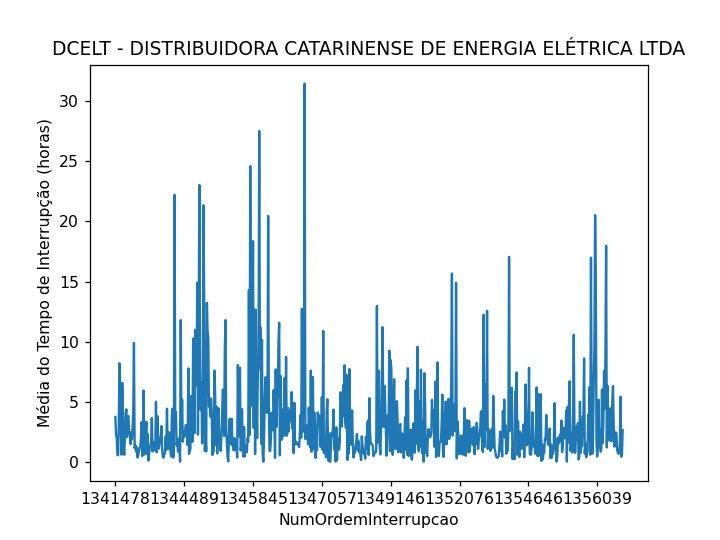

<IPython.core.display.Javascript object>


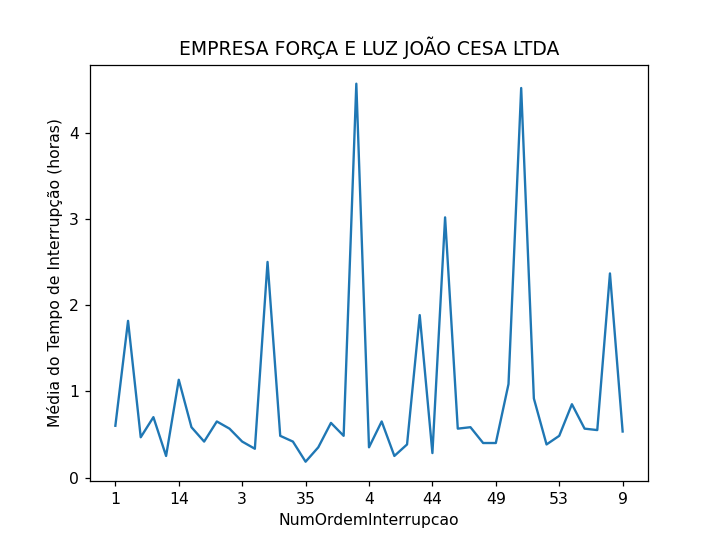

C:\Users\u11886\AppData\Local\Temp\ipykernel_22248\521850987.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


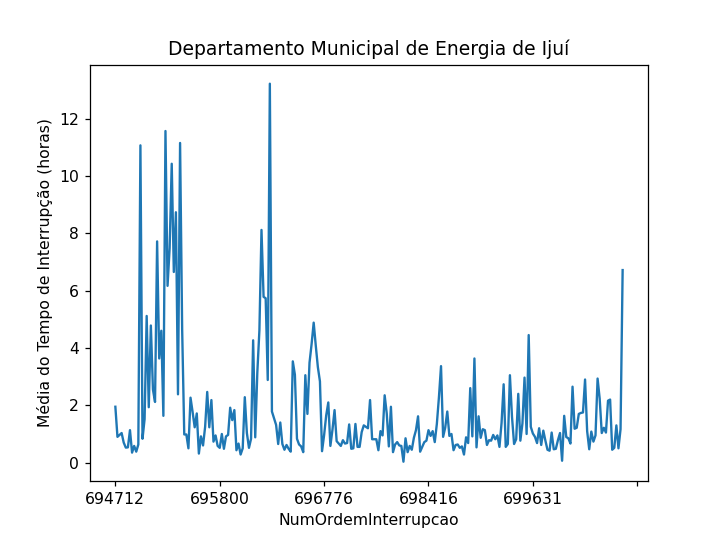

<IPython.core.display.Javascript object>


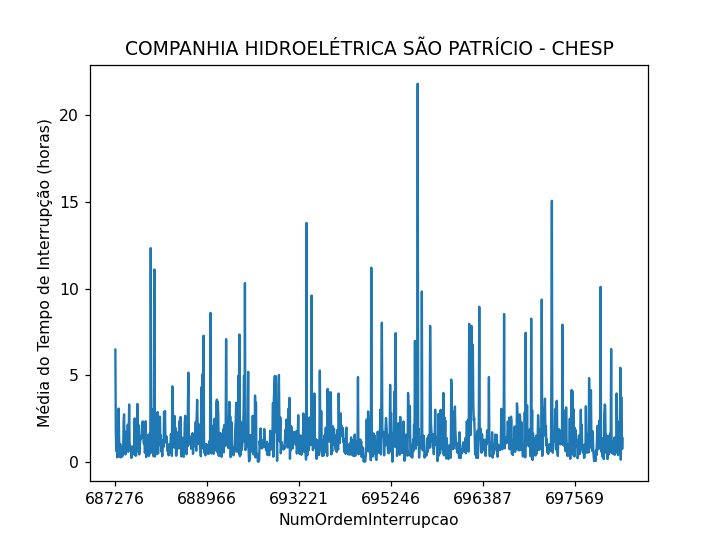

<IPython.core.display.Javascript object>


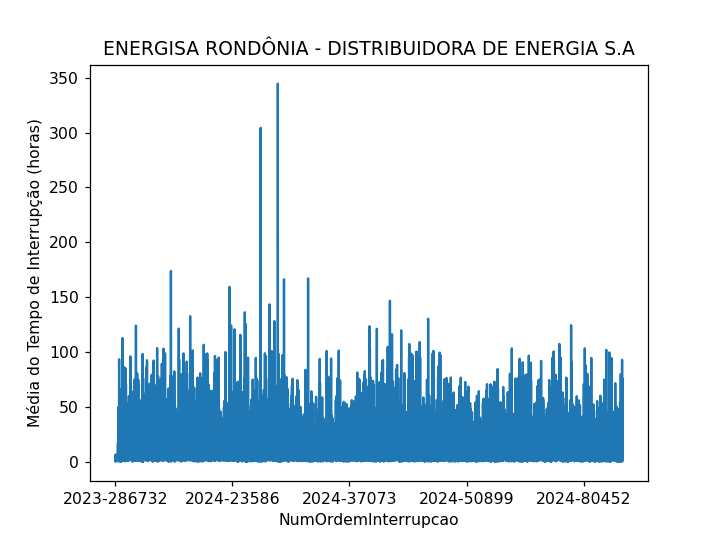

<IPython.core.display.Javascript object>


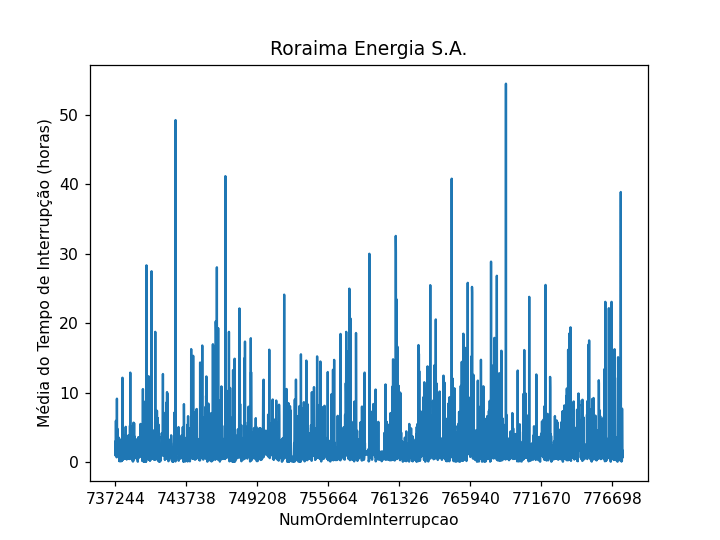

<IPython.core.display.Javascript object>


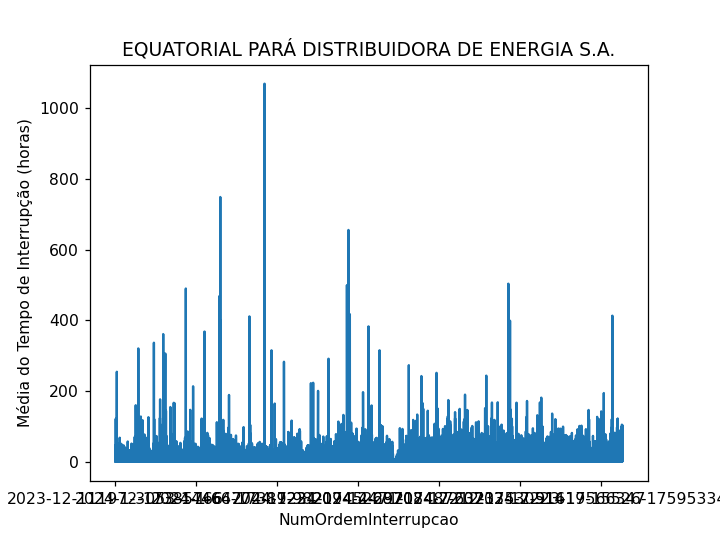

<IPython.core.display.Javascript object>


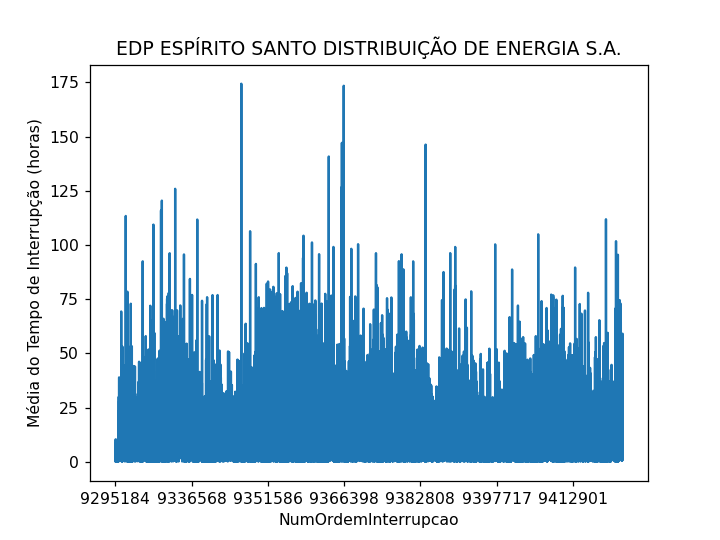

<IPython.core.display.Javascript object>


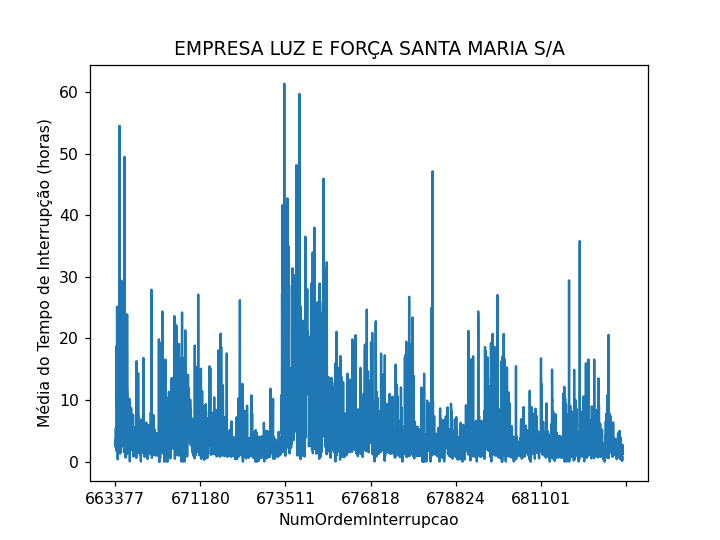

<IPython.core.display.Javascript object>


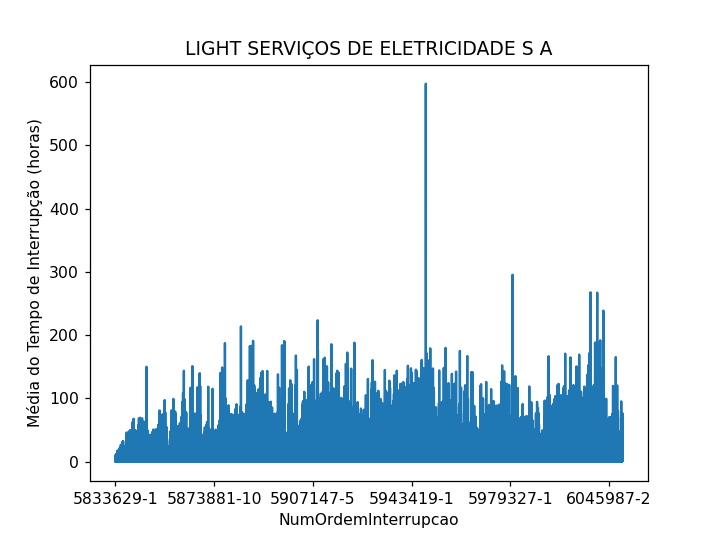

<IPython.core.display.Javascript object>


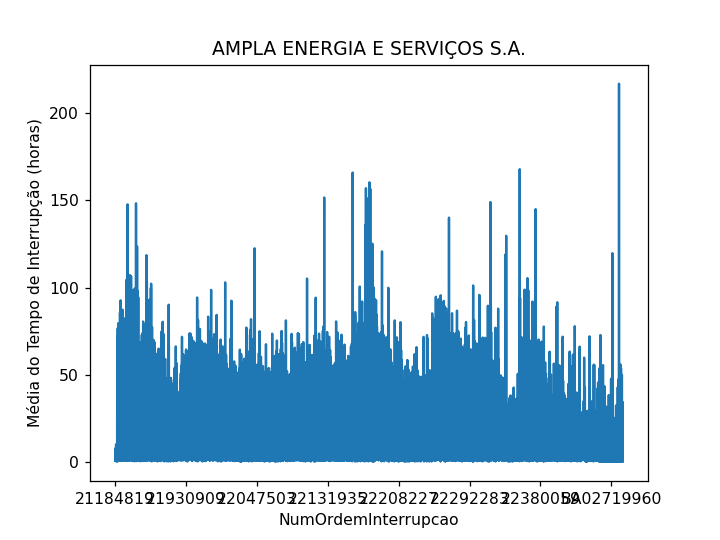

<IPython.core.display.Javascript object>


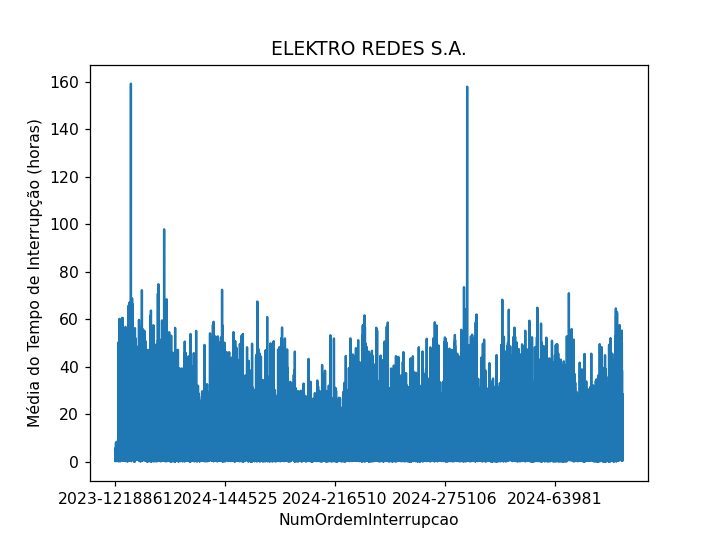

<IPython.core.display.Javascript object>


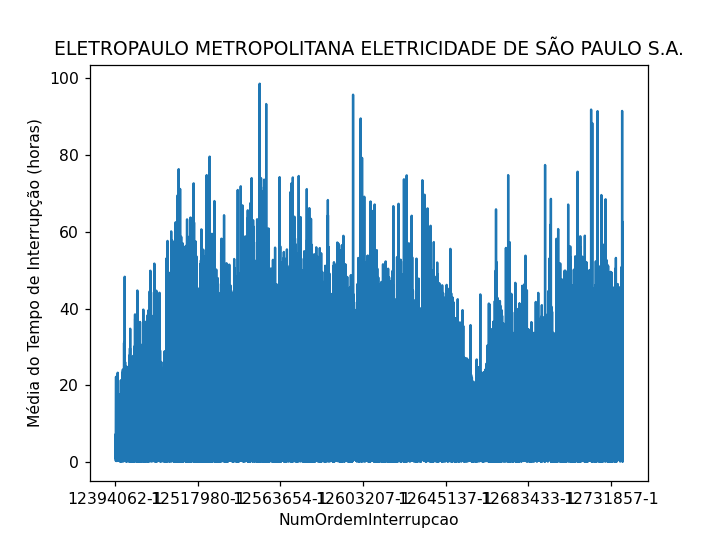

<IPython.core.display.Javascript object>


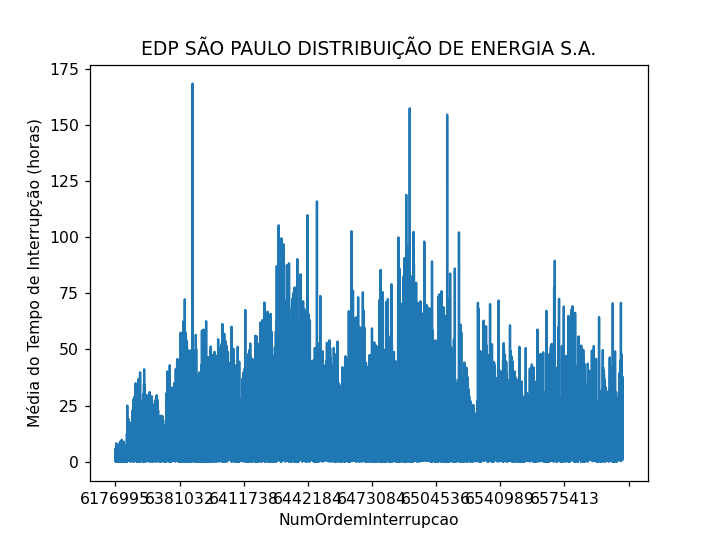

<IPython.core.display.Javascript object>


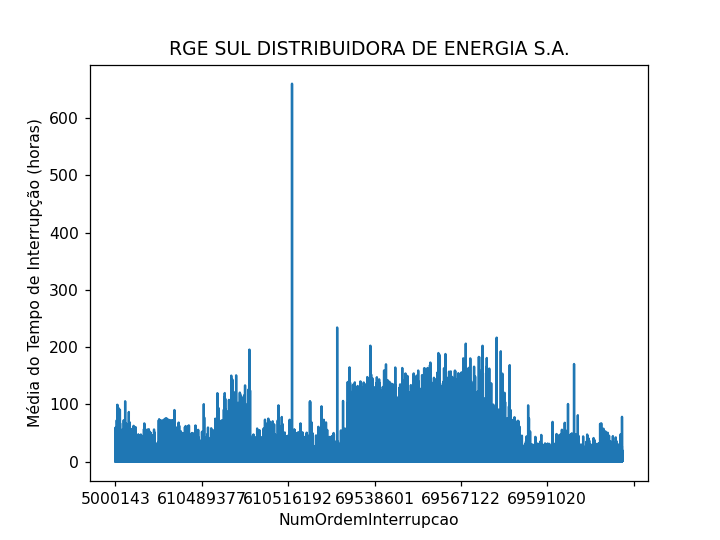

<IPython.core.display.Javascript object>


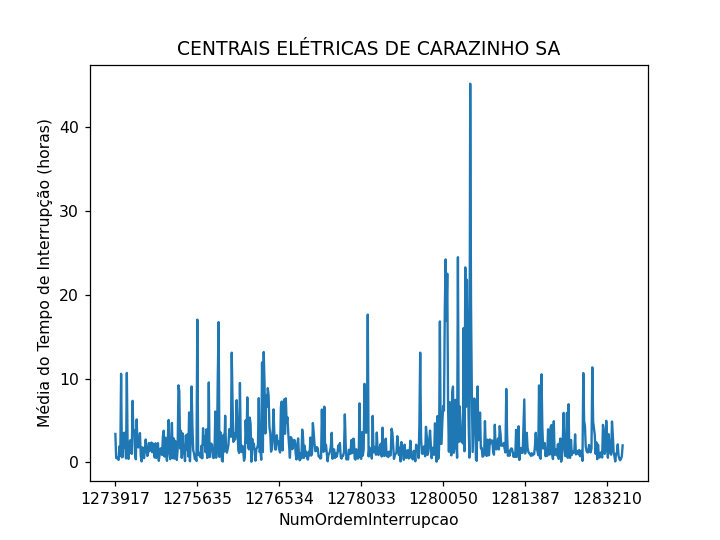

<IPython.core.display.Javascript object>


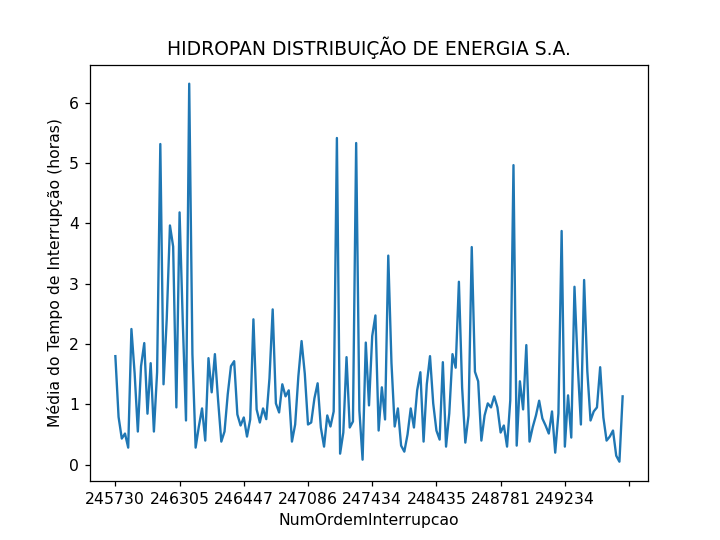

<IPython.core.display.Javascript object>


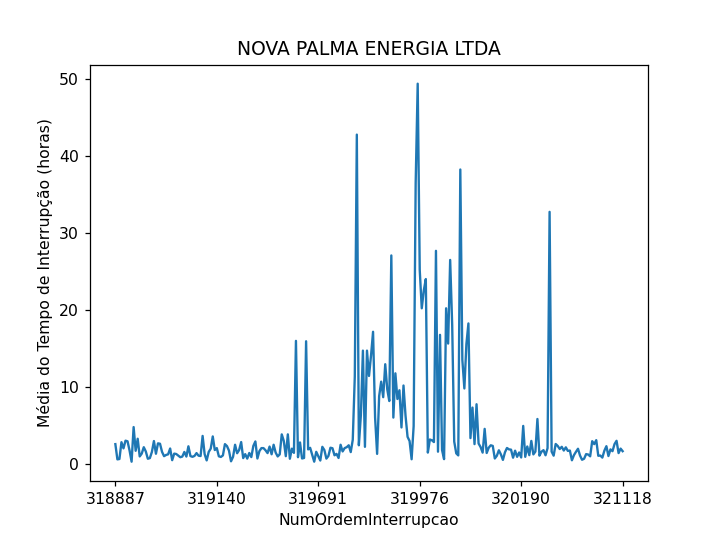

<IPython.core.display.Javascript object>


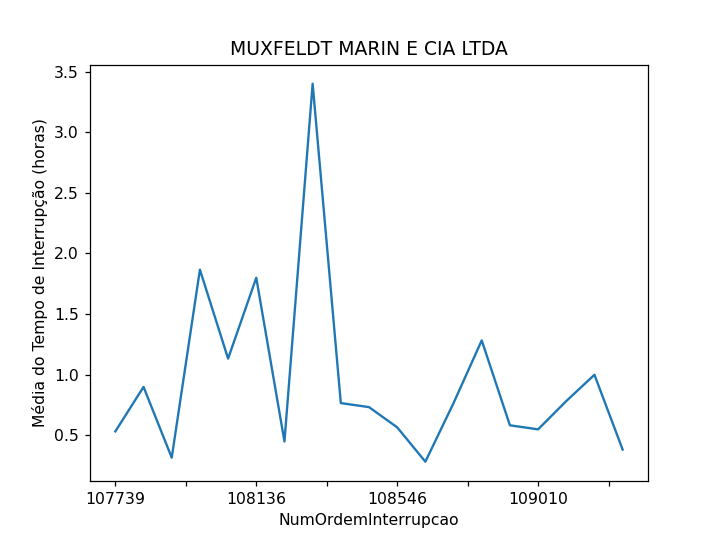

<IPython.core.display.Javascript object>


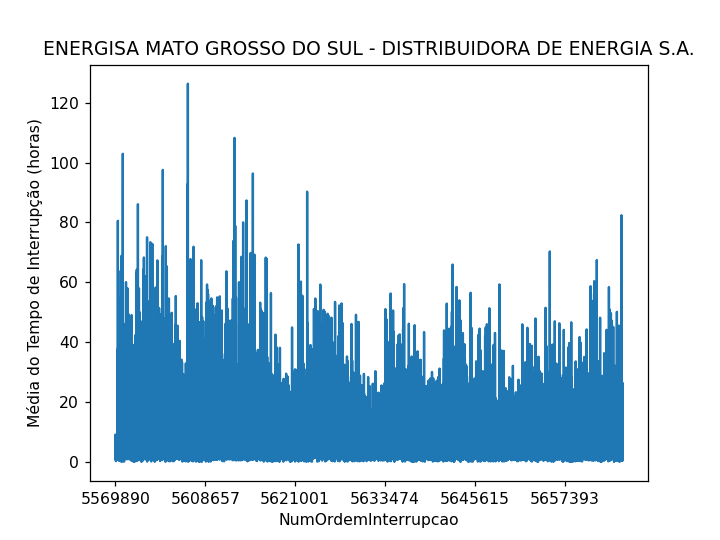

<IPython.core.display.Javascript object>


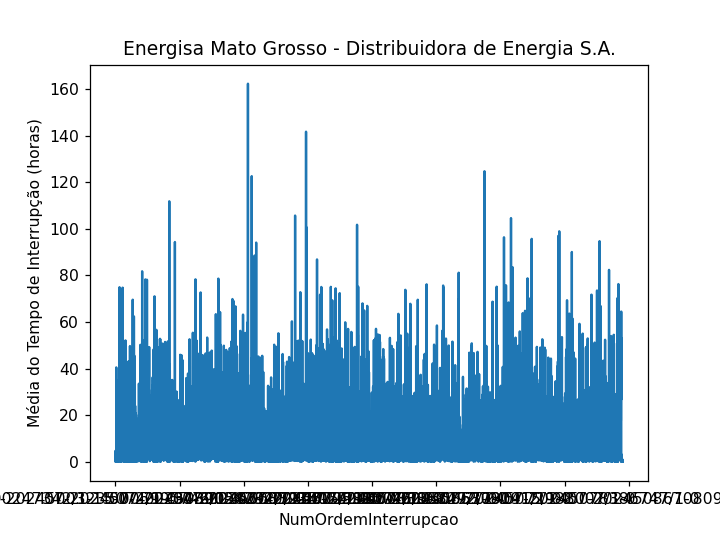

In [6]:
import matplotlib.pyplot as plt

# Agrupa por 'NomAgenteRegulado' e 'NumOrdemInterrupcao'
grupo = df.groupby(['NomAgenteRegulado', 'NumOrdemInterrupcao'])['DiferencaTempo'].mean()

# Obtém a lista de 'NomAgenteRegulado'
agentes = df['NomAgenteRegulado'].unique()

# Cria um gráfico para cada 'NomAgenteRegulado'
for agente in agentes:
    # Verifica se o 'NomAgenteRegulado' existe no objeto `grupo`
    if agente in grupo:
        # Cria uma figura e um eixo
        fig, ax = plt.subplots()

        # Plota os dados para o 'NomAgenteRegulado' atual
        grupo[agente].plot(kind='line', ax=ax)

        # Define os rótulos dos eixos
        ax.set_xlabel('NumOrdemInterrupcao')
        ax.set_ylabel('Média do Tempo de Interrupção (horas)')

        # Define o título do gráfico
        ax.set_title(agente)

        # Mostra o gráfico
        plt.show()


<IPython.core.display.Javascript object>


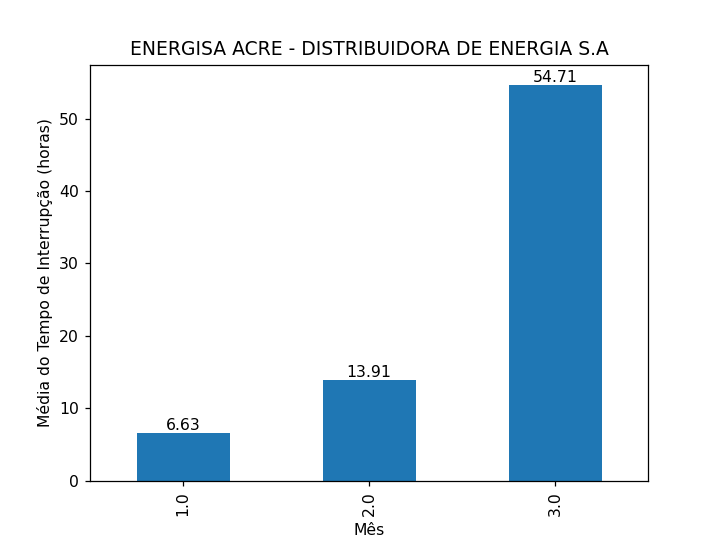

<IPython.core.display.Javascript object>


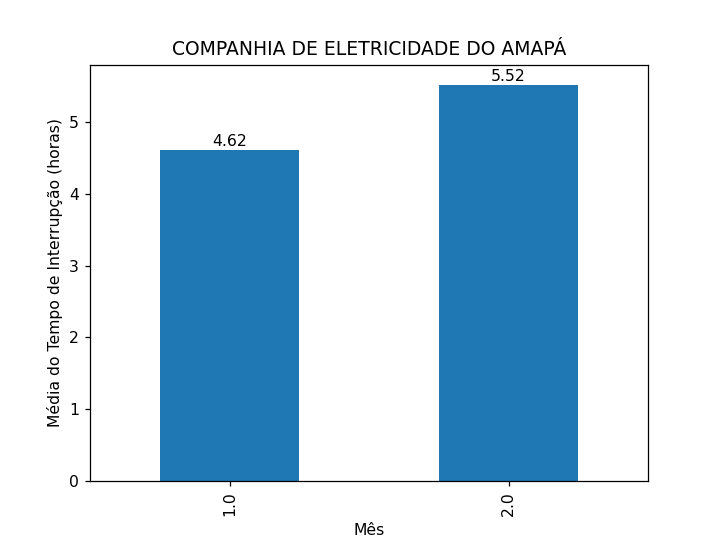

<IPython.core.display.Javascript object>


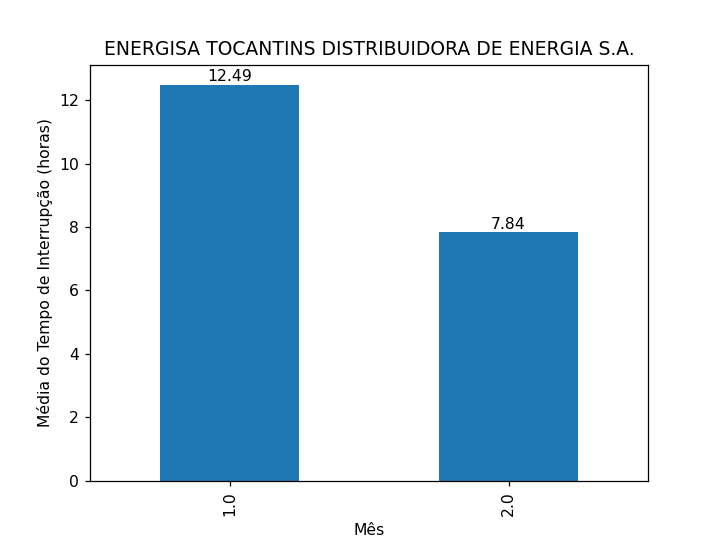

<IPython.core.display.Javascript object>


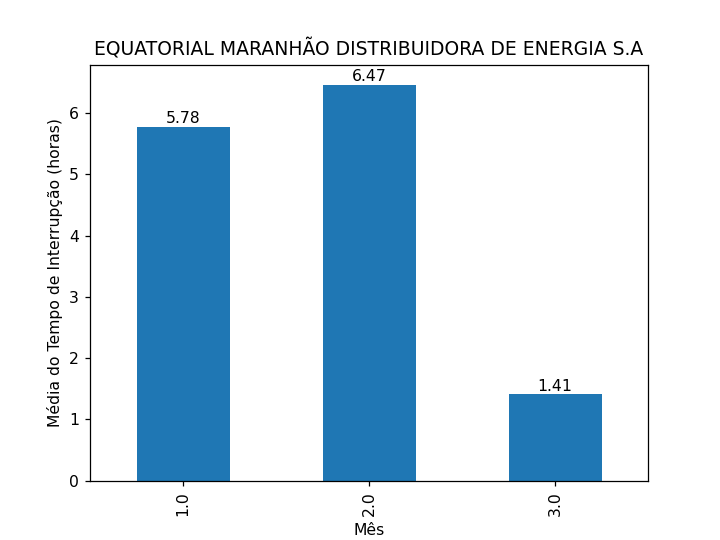

<IPython.core.display.Javascript object>


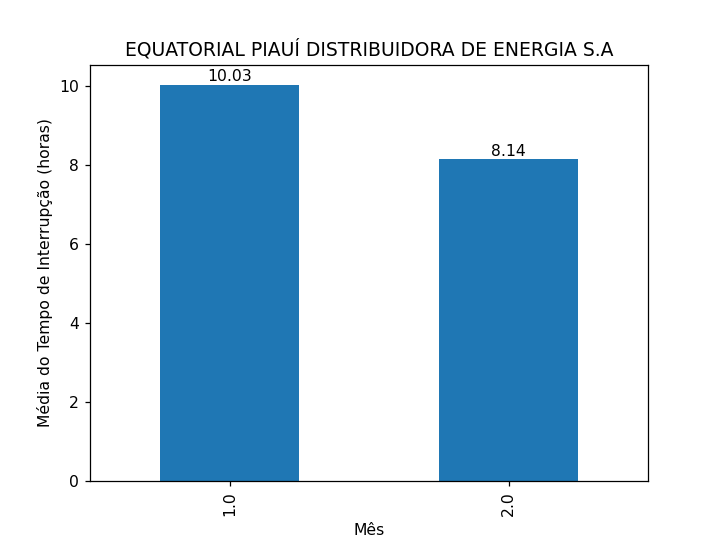

<IPython.core.display.Javascript object>


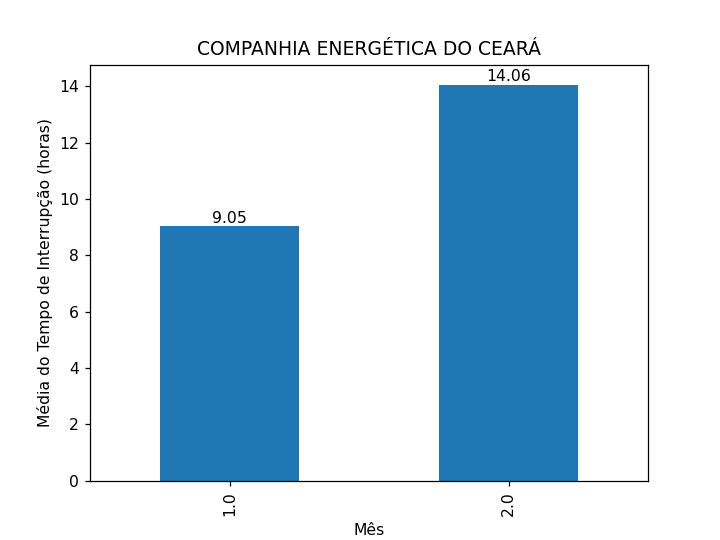

<IPython.core.display.Javascript object>


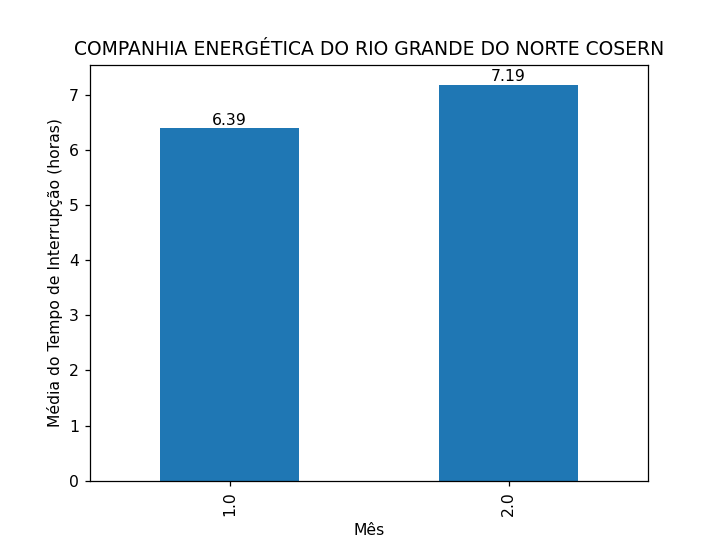

<IPython.core.display.Javascript object>


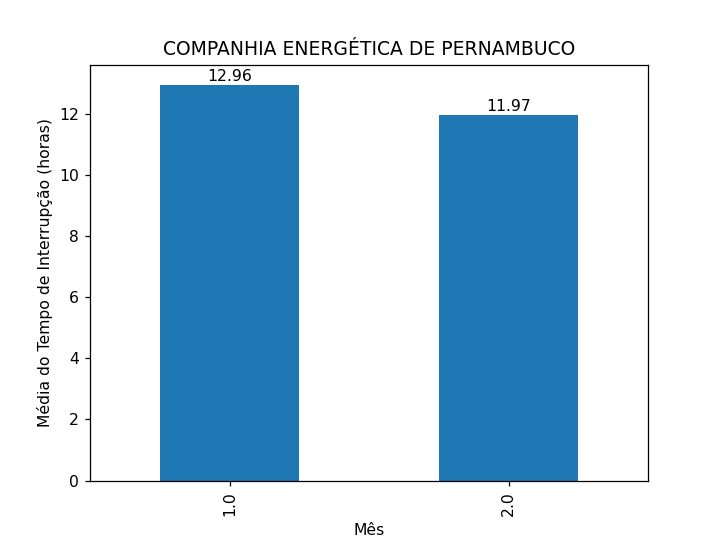

<IPython.core.display.Javascript object>


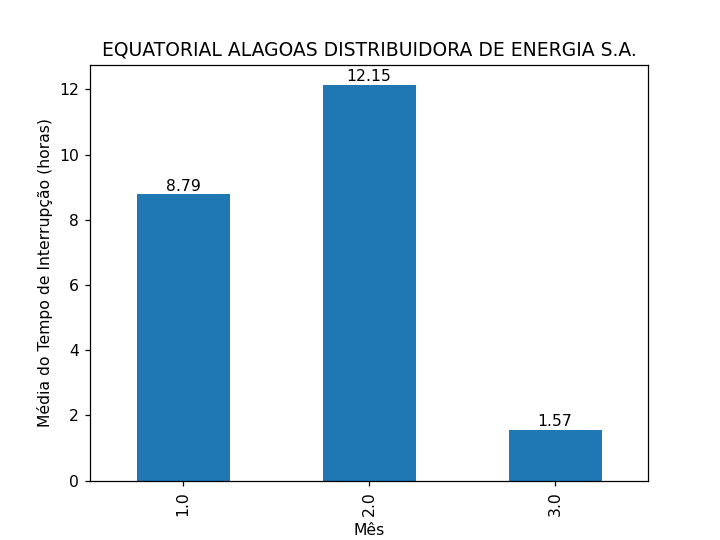

<IPython.core.display.Javascript object>


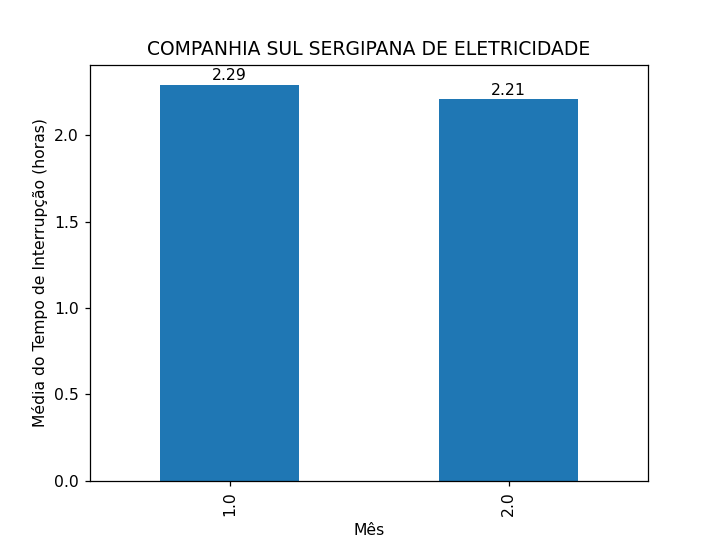

<IPython.core.display.Javascript object>


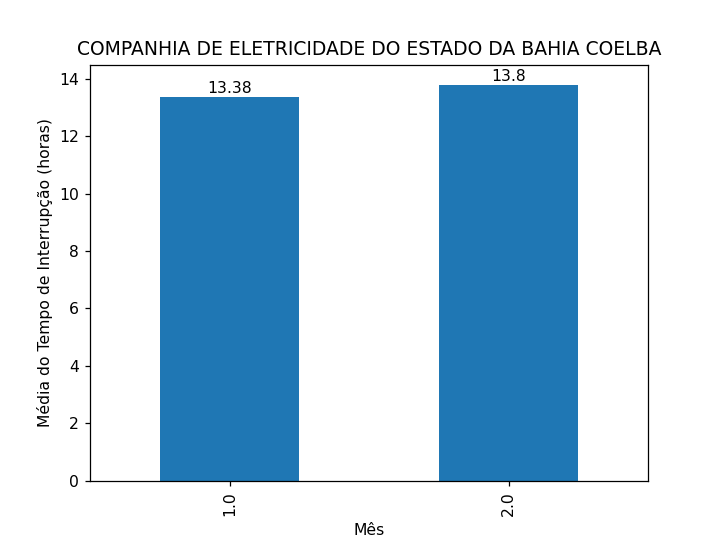

<IPython.core.display.Javascript object>


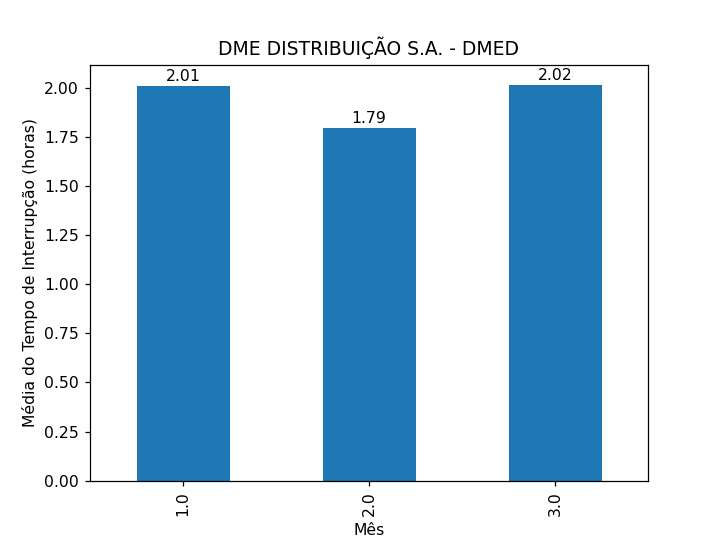

<IPython.core.display.Javascript object>


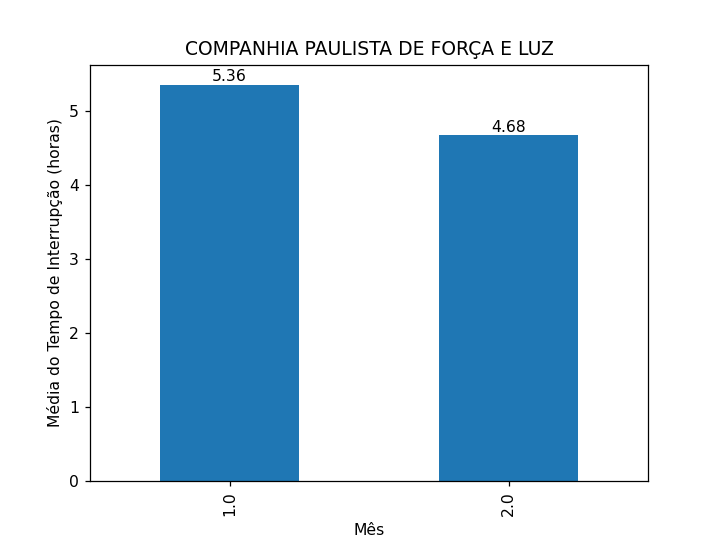

<IPython.core.display.Javascript object>


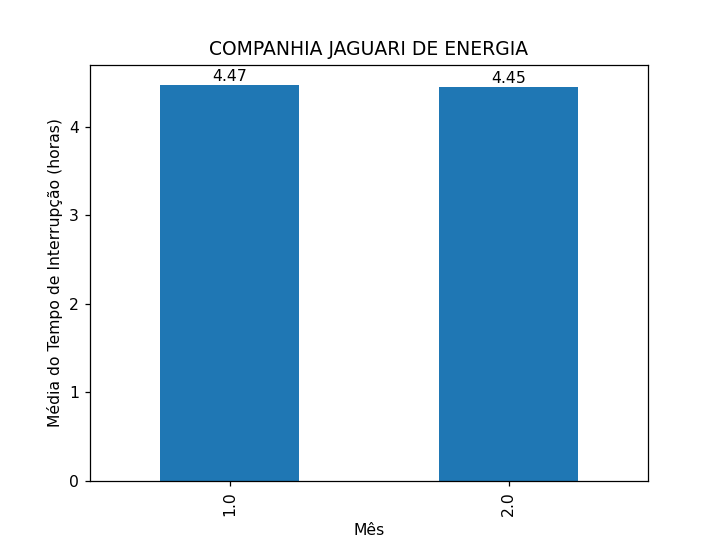

<IPython.core.display.Javascript object>


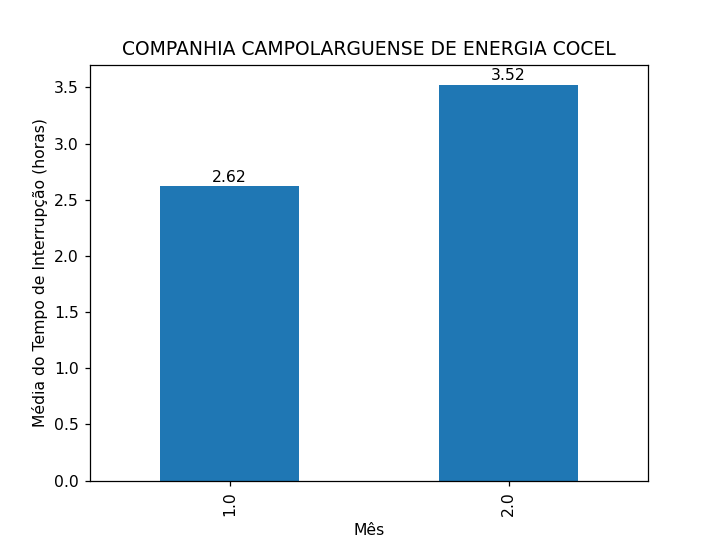

<IPython.core.display.Javascript object>


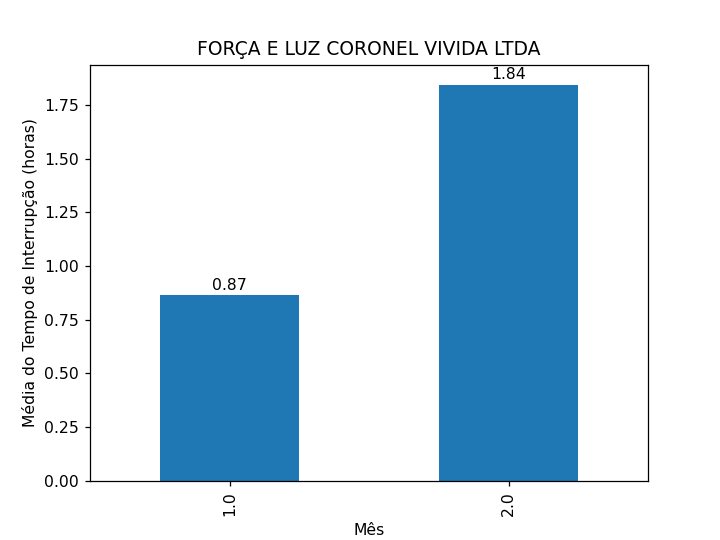

<IPython.core.display.Javascript object>


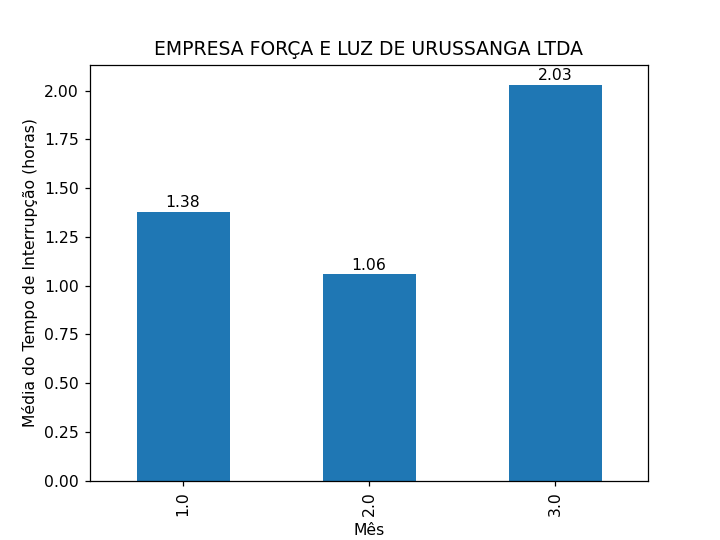

<IPython.core.display.Javascript object>


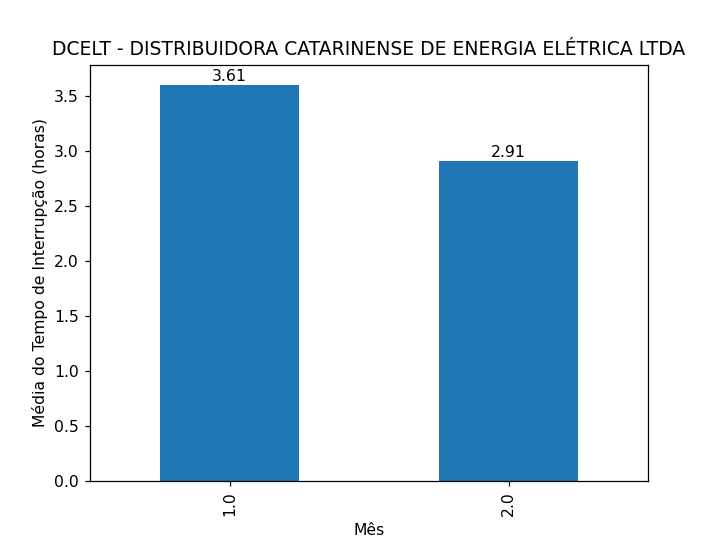

<IPython.core.display.Javascript object>


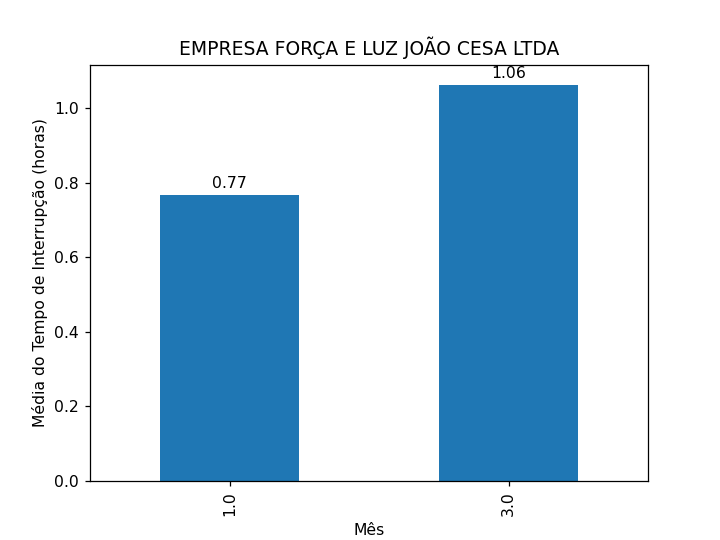

<IPython.core.display.Javascript object>


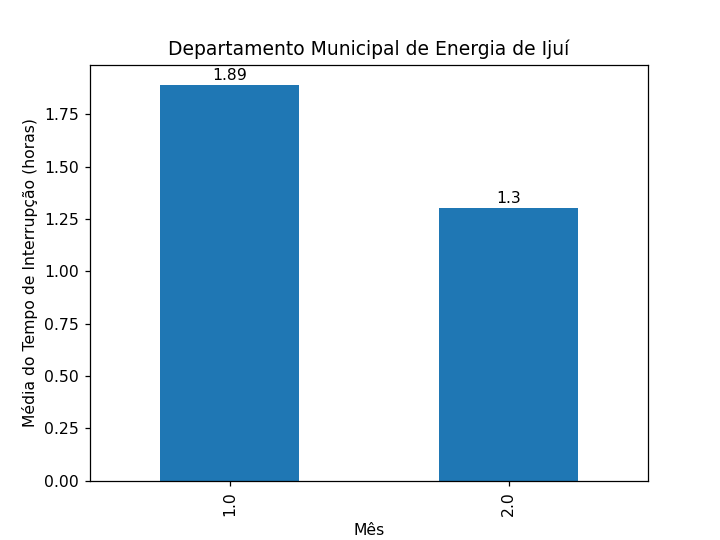

<IPython.core.display.Javascript object>


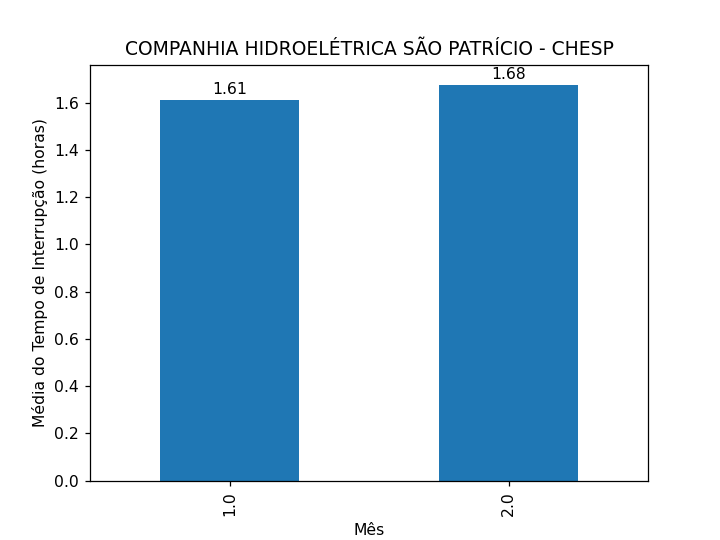

<IPython.core.display.Javascript object>


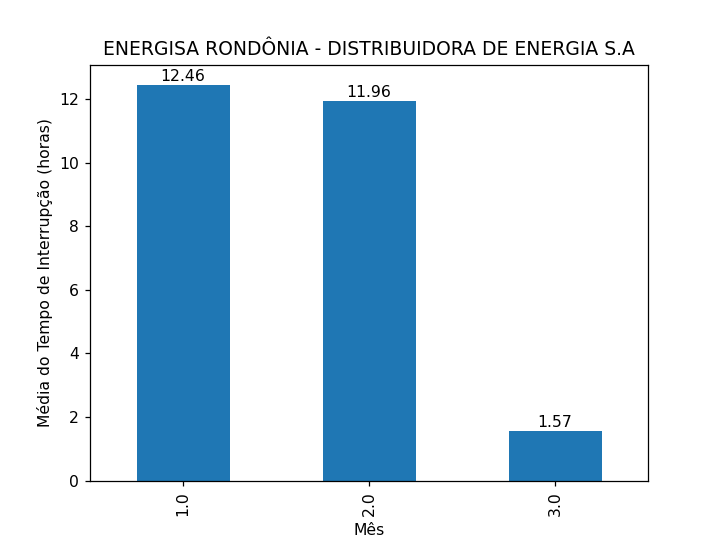

<IPython.core.display.Javascript object>


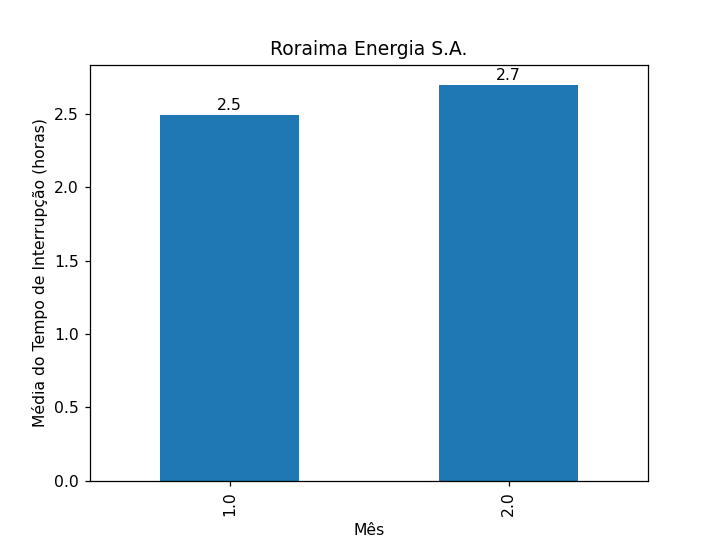

<IPython.core.display.Javascript object>


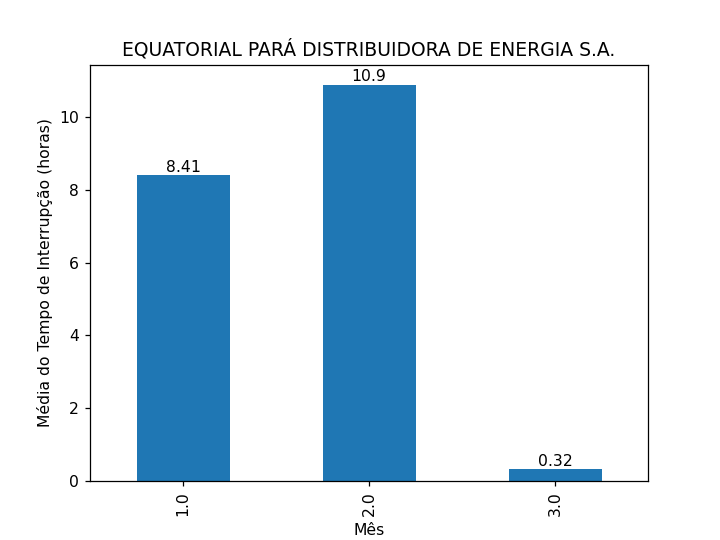

<IPython.core.display.Javascript object>


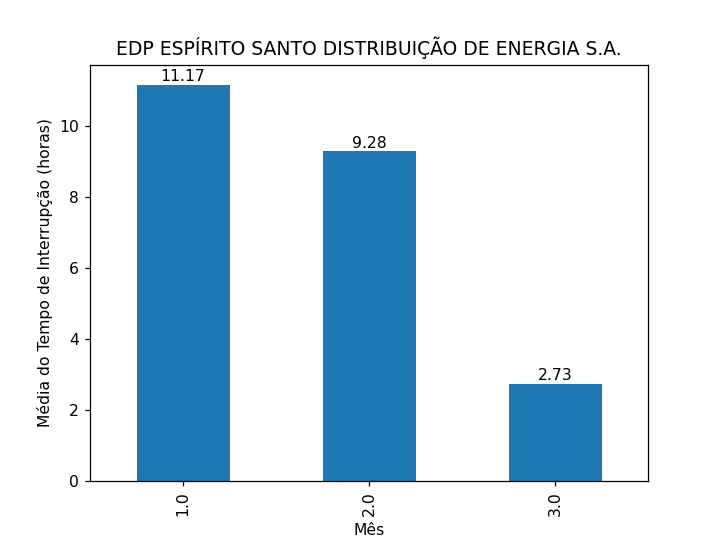

<IPython.core.display.Javascript object>


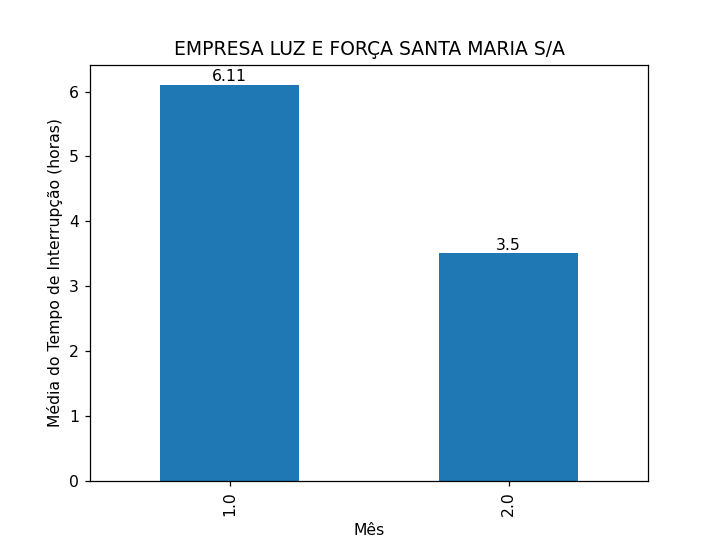

<IPython.core.display.Javascript object>


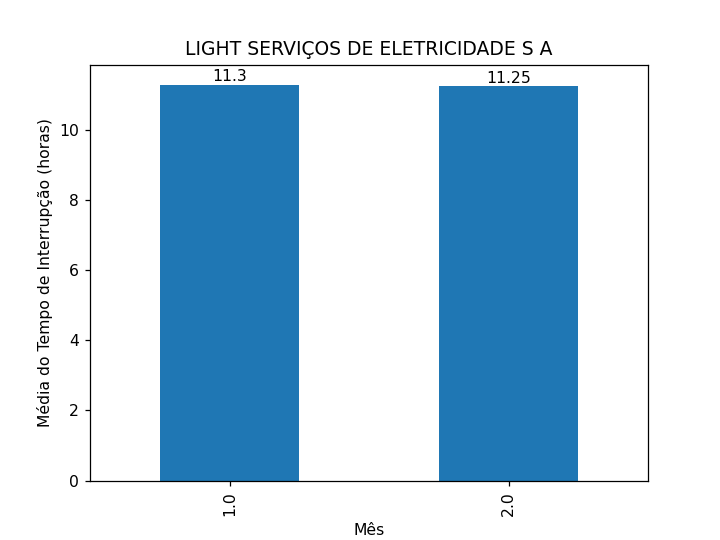

<IPython.core.display.Javascript object>


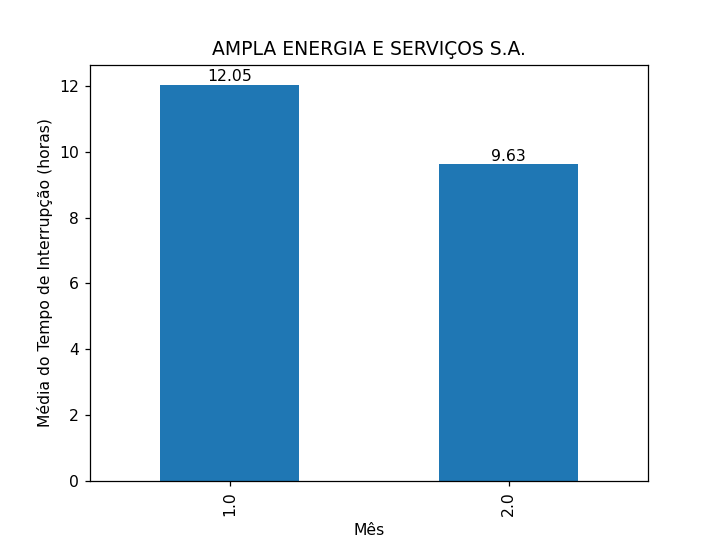

<IPython.core.display.Javascript object>


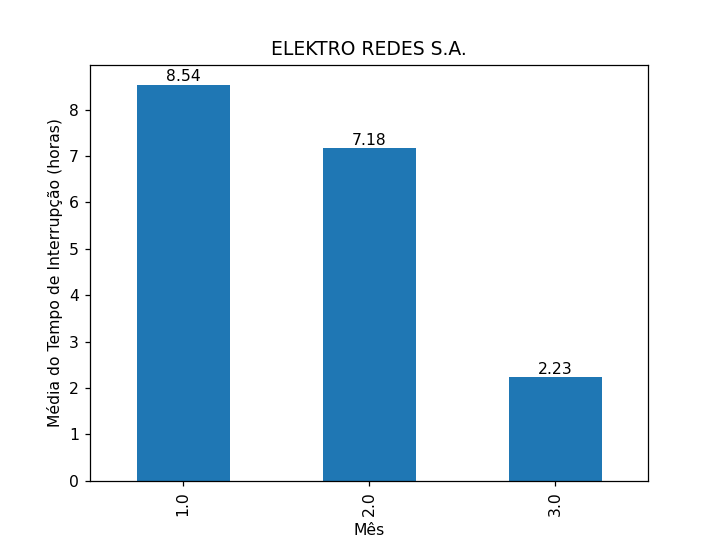

<IPython.core.display.Javascript object>


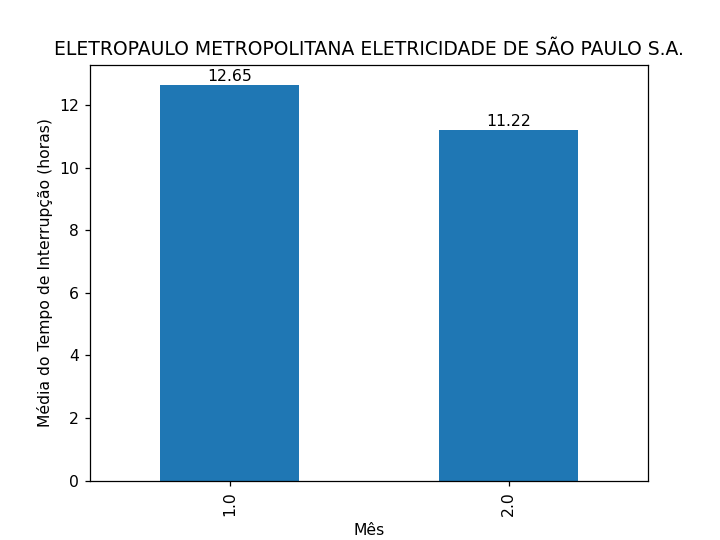

<IPython.core.display.Javascript object>


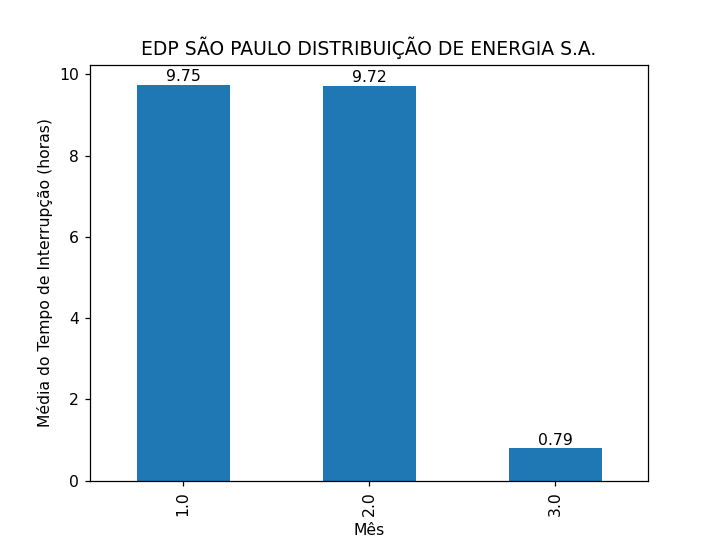

<IPython.core.display.Javascript object>


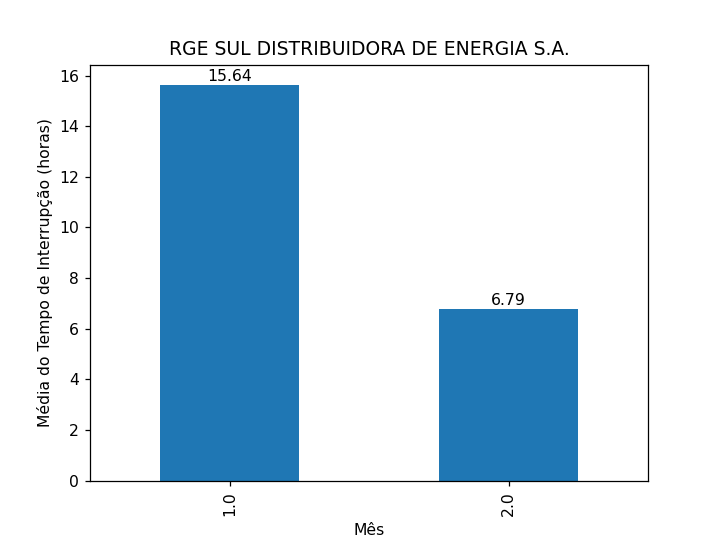

<IPython.core.display.Javascript object>


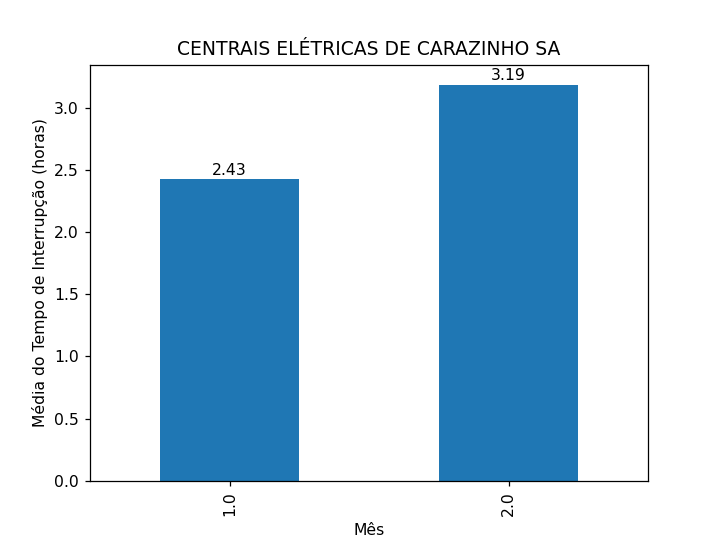

<IPython.core.display.Javascript object>


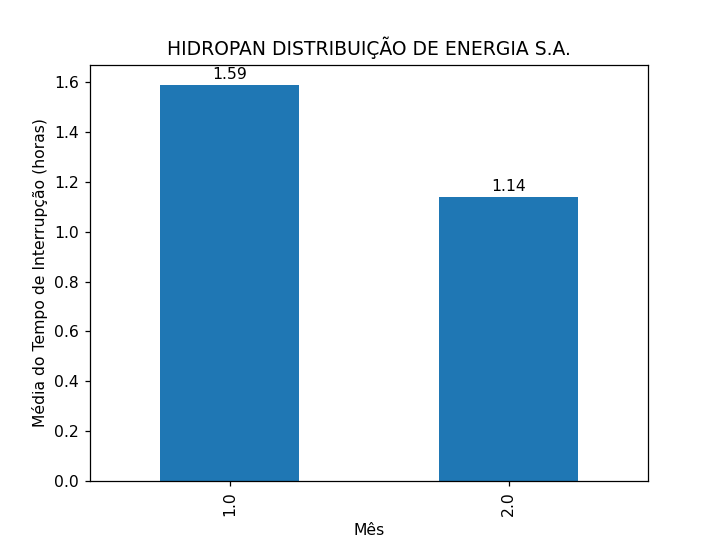

<IPython.core.display.Javascript object>


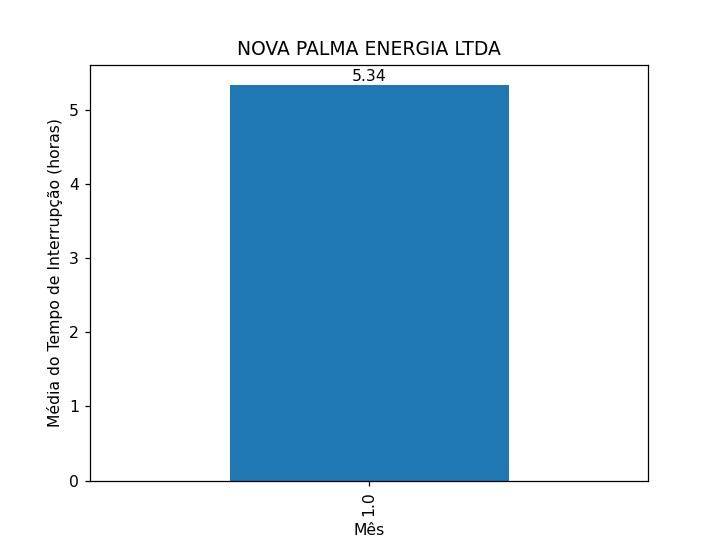

<IPython.core.display.Javascript object>


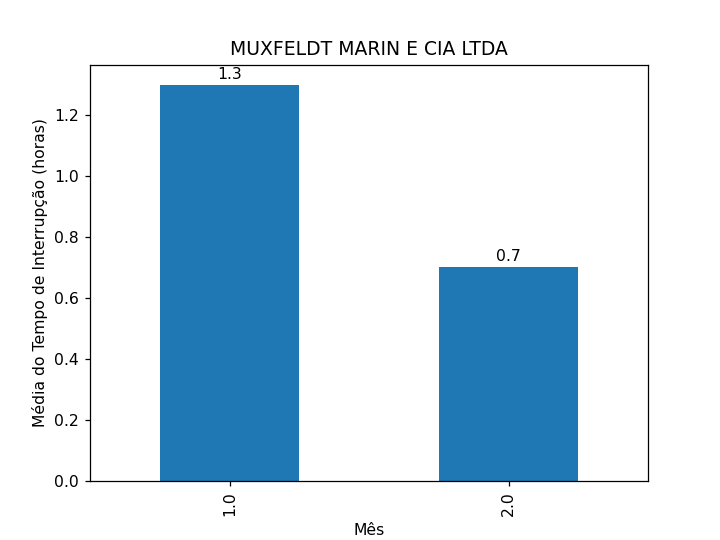

<IPython.core.display.Javascript object>


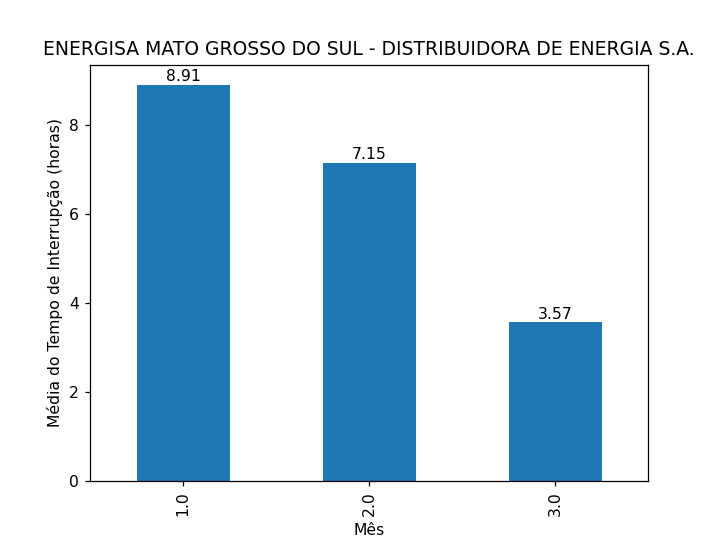

<IPython.core.display.Javascript object>


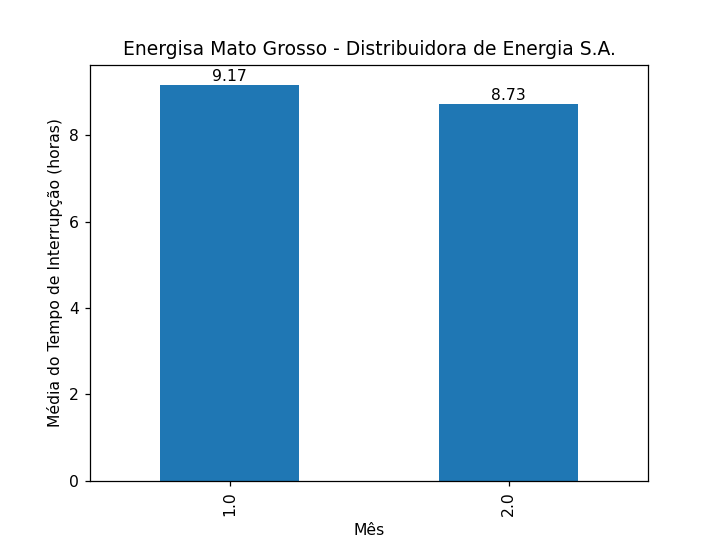

In [9]:
import matplotlib.pyplot as plt

# Extrai o mês da coluna 'DatInicioInterrupcao'
df['Mes'] = df['DatInicioInterrupcao'].dt.month

# Agrupa por 'NomAgenteRegulado' e 'Mes'
grupo = df.groupby(['NomAgenteRegulado', 'Mes'])['DiferencaTempo'].mean()

# Obtém a lista de 'NomAgenteRegulado'
agentes = df['NomAgenteRegulado'].unique()

# Cria um gráfico para cada 'NomAgenteRegulado'
for agente in agentes:
    # Verifica se o 'NomAgenteRegulado' existe no objeto `grupo`
    if agente in grupo:
        # Cria uma figura e um eixo
        fig, ax = plt.subplots()

        # Plota os dados para o 'NomAgenteRegulado' atual
        grupo[agente].plot(kind='bar', ax=ax)

        # Adiciona rótulos de dados a cada barra
        for i, v in enumerate(grupo[agente]):
            ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

        # Define os rótulos dos eixos
        ax.set_xlabel('Mês')
        ax.set_ylabel('Média do Tempo de Interrupção (horas)')

        # Define o título do gráfico
        ax.set_title(agente)

        # Mostra o gráfico
        plt.show()
